In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from collections import Counter

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/colab/
!ls

/content/gdrive/MyDrive/colab
 ADNI_Dataset.csv		  Mall_Customers.csv
 boston.csv			  MaskRCNN
 cardio_train.csv		  online.csv
'car drive risk.csv'		  parkinsons_updrs.data.csv
'car driving risk analysis.csv'   plot1.png
'Car Price.csv'			  plot2.png
 carprices.csv			  plot.png
 clean_data.csv			  plot.svg
 clean_data.gsheet		  plot_t.svg
 countplot_t.png		 'profit prediction.csv'
 countplot_t.svg		  Rape_cases_BD.csv
 Customer-Churn-Prediction.csv	  roc_curve_t.png
 data.csv			  roc_curve_t.svg
 decision2.csv			 'Sample data (2).csv'
'dhaka homeprices.csv'		  stage1_test
 emails.csv			  stage1_train
'feature scaling.csv'		  Strokesdataset.csv
 heatmap_t.svg			  train.csv


In [ ]:
df = pd.read_csv("ADNI_Dataset.csv")

In [ ]:
df

,RID,VISCODE,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,ADMCI3,AD123,...,RD_SCC_R,RD_RLIC_L,RD_RLIC_R,RD_TAP_L,RD_TAP_R,RD_SUMGCC,RD_SUMBCC,RD_SUMSCC,RD_SUMCC,RD_SUMFX
0,4018,bl,0,1,1700.0,1,238.6,22.26,CN,1,...,0.000703,0.000663,0.000660,0.001371,0.001323,0.000811,0.001060,0.000728,0.000858,0.002141
1,4119,bl,0,1,1700.0,1,305.6,30.31,CN,1,...,0.000702,0.000597,0.000587,0.001430,0.001414,0.000852,0.001014,0.000725,0.000853,0.002090
2,4121,bl,0,2,1345.0,1,304.8,26.15,CN,1,...,0.000762,0.000676,0.000740,0.001615,0.001260,0.000868,0.001138,0.000790,0.000922,0.002227
3,4148,bl,0,1,1352.0,1,186.7,15.01,CN,1,...,0.000609,0.000625,0.000594,0.000993,0.000833,0.000722,0.000809,0.000612,0.000701,0.001456
4,4254,bl,1,2,1194.0,1,377.5,31.96,CN,1,...,0.000763,0.000725,0.000643,0.001475,0.001097,0.000952,0.001095,0.000801,0.000930,0.001981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2376,bl,0,1,999999.0,999999,999999.0,999999.00,EMCI,3,...,0.001060,0.000720,0.000785,0.001784,0.001846,0.001101,0.001413,0.001039,0.001189,0.002322
173,4327,bl,0,2,999999.0,999999,999999.0,999999.00,EMCI,3,...,0.000802,0.000697,0.000671,0.001898,0.001345,0.000814,0.001111,0.000873,0.000951,0.002214
174,4459,bl,1,2,999999.0,999999,999999.0,999999.00,CN,1,...,0.000668,0.000603,0.000571,0.001250,0.001096,0.000736,0.000955,0.000664,0.000784,0.001827
175,2071,bl,0,2,999999.0,999999,999999.0,999999.00,EMCI,3,...,0.001041,0.000792,0.000723,0.002051,0.001765,0.000977,0.001274,0.001087,0.001135,0.002087


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 266 entries, RID to RD_SUMFX
dtypes: float64(238), int64(25), object(3)
memory usage: 368.0+ KB


In [ ]:
df.isnull()

,RID,VISCODE,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,ADMCI3,AD123,...,RD_SCC_R,RD_RLIC_L,RD_RLIC_R,RD_TAP_L,RD_TAP_R,RD_SUMGCC,RD_SUMBCC,RD_SUMSCC,RD_SUMCC,RD_SUMFX
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()

RID          False
VISCODE      False
Gender01     False
Marry123     False
ABETA1700    False
             ...  
RD_SUMGCC    False
RD_SUMBCC    False
RD_SUMSCC    False
RD_SUMCC     False
RD_SUMFX     False
Length: 266, dtype: bool

In [ ]:
#df = df.drop(['RID', 'VISCODE', 'Marry123', 'MidTemp', 'PTRACCAT', 'FDG','Ventricles','LDELTOT', 'TRAB', 'FAQ', 'MOCA', 'ICV', 'ADASQ4', 'LDELTOT', 'AV45', 'MMSE', 'CDRSB','ABETA12','AD123'], axis = 1 )
#df

In [ ]:
df= df.drop(['ADMCI3','ADAS11','ADAS13','ADASQ4','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting','FAQ', 'LDELTOT', 'MOCA','MMSE','RID','VISCODE', 'MD_CST_L','MD_CST_R','MD_ICP_L','MD_ICP_R','MD_ML_L','MD_ML_R','MD_SCP_L','MD_SCP_R','MD_CP_L','MD_CP_R','MD_ALIC_L','MD_ALIC_R','MD_PLIC_L','MD_PLIC_R','MD_PTR_L','MD_PTR_R','MD_ACR_L','MD_ACR_R','MD_SCR_L','MD_SCR_R','MD_PCR_L','MD_PCR_R','MD_CGC_L','MD_CGC_R','MD_CGH_L','MD_CGH_R','MD_FX_ST_L','MD_FX_ST_R','RD_CGC_R','MD_SCC_R','MD_RLIC_L','MD_RLIC_R','MD_TAP_L','MD_TAP_R','MD_SUMGCC','MD_SUMBCC','MD_SUMSCC','MD_SUMCC','MD_SUMFX','RD_CST_L','RD_CST_R','RD_ICP_L','RD_ICP_R','RD_ML_L','RD_ML_R','RD_SCP_L','RD_SCP_R','RD_CP_L','RD_CP_R','RD_ALIC_L','RD_ALIC_R','RD_PLIC_L','RD_PLIC_R','RD_PTR_L','RD_PTR_R','RD_ACR_L','RD_ACR_R','RD_SCR_L','RD_SCR_R','RD_PCR_L','RD_PCR_R','RD_CGC_L','RD_CGH_L','RD_CGH_R','RD_FX_ST_L','RD_FX_ST_R','RD_SLF_L','RD_SLF_R','RD_SFO_L','MD_IFO_R','MD_SS_L','MD_SS_R','MD_EC_L','MD_EC_R','MD_SLF_L','MD_SLF_R','MD_SFO_L','MD_SFO_R','MD_IFO_L','MD_UNC_L','MD_UNC_R','MD_FX_L','MD_FX_R','MD_GCC_L','MD_GCC_R','MD_BCC_L','MD_BCC_R','MD_SCC_L','RD_SFO_R','RD_IFO_L','RD_IFO_R','RD_SS_L','RD_SS_R','RD_EC_L','RD_EC_R','RD_UNC_L','RD_UNC_R','RD_FX_L','RD_FX_R','RD_GCC_L','RD_GCC_R','RD_BCC_L','RD_BCC_R','RD_SCC_L','RD_SCC_R','RD_RLIC_L','RD_RLIC_R','RD_TAP_L','RD_TAP_R','RD_SUMGCC','RD_SUMBCC','RD_SUMSCC','RD_SUMCC','RD_SUMFX','AD_CST_L','AD_CST_R','AD_ICP_L','AD_ICP_R','AD_ML_L','AD_ML_R','AD_SCP_L','AD_SCP_R','AD_CP_L','AD_CP_R','AD_ALIC_L','AD_ALIC_R','AD_PLIC_L','AD_PLIC_R','AD_PTR_L','AD_PTR_R','AD_ACR_L','AD_ACR_R','AD_SCR_L','AD_SCR_R','FA_ACR_R','FA_SCR_L','FA_SCR_R','FA_PCR_L','FA_PCR_R','FA_CGC_L','FA_CGC_R','FA_CGH_L','FA_CGH_R','FA_FX_ST_L','FA_FX_ST_R','FA_SLF_L','FA_SLF_R','FA_SFO_L','FA_SFO_R','FA_IFO_L','FA_IFO_R','FA_SS_L','FA_SS_R','FA_EC_L','FA_EC_R','FA_UNC_L','FA_UNC_R','FA_FX_L','FA_FX_R','FA_GCC_L','FA_GCC_R','FA_BCC_L','FA_BCC_R','FA_SCC_L','FA_SCC_R','FA_RLIC_L','FA_RLIC_R','FA_TAP_L','FA_TAP_R','FA_SUMGCC','FA_SUMBCC','FA_SUMSCC','FA_SUMCC','FA_SUMFX','AD_PCR_L','AD_PCR_R','AD_SS_L','AD_SS_R','AD_EC_L','AD_EC_R','AD_UNC_L','AD_UNC_R','AD_FX_L','AD_FX_R','AD_GCC_L','AD_GCC_R','AD_BCC_L','AD_BCC_R','AD_SCC_L','AD_SCC_R','AD_RLIC_L','AD_RLIC_R','AD_TAP_L','AD_TAP_R','AD_SUMGCC','AD_SUMBCC','AD_SUMSCC','AD_SUMCC','AD_SUMFX','FA_CST_L','FA_CST_R','FA_ICP_L','FA_ICP_R','FA_ML_L','FA_ML_R','FA_SCP_L','FA_SCP_R','FA_CP_L','FA_CP_R','FA_ALIC_L','FA_ALIC_R','FA_PLIC_L','FA_PLIC_R','FA_PTR_L','FA_PTR_R','FA_ACR_L','AD_CGC_L','AD_CGC_R','AD_CGH_L','AD_CGH_R','AD_FX_ST_L','AD_FX_ST_R','AD_SLF_L','AD_SLF_R','AD_SFO_L','AD_SFO_R','AD_IFO_L','AD_IFO_R'], axis = 1)

In [ ]:
df

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45AB12,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,0,1,1700.0,1,238.6,22.26,1,76.1,18,White,...,0,0.0,110,33175,7843,1.056436e+06,3580,17237,21861,1534348.907
1,0,1,1700.0,1,305.6,30.31,1,79.3,20,White,...,0,0.0,36,38806,7274,1.115135e+06,4204,22128,21497,1546641.936
2,0,2,1345.0,1,304.8,26.15,1,89.0,16,White,...,0,0.0,117,32628,6456,9.610572e+05,4113,19714,18757,1382468.977
3,0,1,1352.0,1,186.7,15.01,1,73.0,18,White,...,0,0.0,40,14152,8695,1.124853e+06,4443,22278,21521,1562059.325
4,1,2,1194.0,1,377.5,31.96,1,85.9,12,White,...,0,0.0,94,999999,6217,8.769380e+05,999999,999999,999999,1258818.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,1,999999.0,999999,999999.0,999999.00,3,81.9,17,White,...,1,1.5,94,74527,6133,1.171640e+06,4756,26192,22177,1783959.393
173,0,2,999999.0,999999,999999.0,999999.00,3,82.9,12,White,...,1,2.0,77,60345,7661,1.094249e+06,999999,999999,999999,1584295.231
174,1,2,999999.0,999999,999999.0,999999.00,1,68.1,20,White,...,999999,0.0,64,999999,7798,9.999990e+05,999999,999999,999999,1375170.484
175,0,2,999999.0,999999,999999.0,999999.00,3,84.9,20,White,...,999999,1.0,270,49495,7145,9.703335e+05,999999,999999,999999,1599442.666


In [ ]:
#df.dropna(how='any').shape

In [ ]:
df =df.replace(999999,np.nan)
df

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45AB12,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,0,1.0,1700.0,1.0,238.6,22.26,1,76.1,18,White,...,0.0,0.0,110.0,33175.0,7843.0,1.056436e+06,3580.0,17237.0,21861.0,1534348.907
1,0,1.0,1700.0,1.0,305.6,30.31,1,79.3,20,White,...,0.0,0.0,36.0,38806.0,7274.0,1.115135e+06,4204.0,22128.0,21497.0,1546641.936
2,0,2.0,1345.0,1.0,304.8,26.15,1,89.0,16,White,...,0.0,0.0,117.0,32628.0,6456.0,9.610572e+05,4113.0,19714.0,18757.0,1382468.977
3,0,1.0,1352.0,1.0,186.7,15.01,1,73.0,18,White,...,0.0,0.0,40.0,14152.0,8695.0,1.124853e+06,4443.0,22278.0,21521.0,1562059.325
4,1,2.0,1194.0,1.0,377.5,31.96,1,85.9,12,White,...,0.0,0.0,94.0,NaN,6217.0,8.769380e+05,NaN,NaN,NaN,1258818.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,1.0,NaN,NaN,NaN,NaN,3,81.9,17,White,...,1.0,1.5,94.0,74527.0,6133.0,1.171640e+06,4756.0,26192.0,22177.0,1783959.393
173,0,2.0,NaN,NaN,NaN,NaN,3,82.9,12,White,...,1.0,2.0,77.0,60345.0,7661.0,1.094249e+06,NaN,NaN,NaN,1584295.231
174,1,2.0,NaN,NaN,NaN,NaN,1,68.1,20,White,...,NaN,0.0,64.0,NaN,7798.0,NaN,NaN,NaN,NaN,1375170.484
175,0,2.0,NaN,NaN,NaN,NaN,3,84.9,20,White,...,NaN,1.0,270.0,49495.0,7145.0,9.703335e+05,NaN,NaN,NaN,1599442.666


In [ ]:
df.median()

<ipython-input-14-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Gender01       0.000000e+00
Marry123       1.000000e+00
ABETA1700      8.839000e+02
ABETA12        2.000000e+00
TAU80          2.532000e+02
PTAU8          2.415000e+01
AD123          3.000000e+00
AGE            7.320000e+01
EDU            1.600000e+01
APOE4          1.000000e+00
APOE4B         1.000000e+00
FDG            1.266740e+00
AV45           1.187384e+00
AV45AB12       1.000000e+00
CDRSB          1.000000e+00
TRAB           9.600000e+01
Ventricles     3.430800e+04
Hippocampus    6.893000e+03
WholeBrain     1.050914e+06
Entorhinal     3.653000e+03
Fusiform       1.831450e+04
MidTemp        2.080150e+04
ICV            1.470907e+06
dtype: float64

In [ ]:
df = df.fillna(df.median())
df

<ipython-input-15-61699e08d44f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45AB12,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,0,1.0,1700.0,1.0,238.6,22.26,1,76.1,18,White,...,0.0,0.0,110.0,33175.0,7843.0,1.056436e+06,3580.0,17237.0,21861.0,1534348.907
1,0,1.0,1700.0,1.0,305.6,30.31,1,79.3,20,White,...,0.0,0.0,36.0,38806.0,7274.0,1.115135e+06,4204.0,22128.0,21497.0,1546641.936
2,0,2.0,1345.0,1.0,304.8,26.15,1,89.0,16,White,...,0.0,0.0,117.0,32628.0,6456.0,9.610572e+05,4113.0,19714.0,18757.0,1382468.977
3,0,1.0,1352.0,1.0,186.7,15.01,1,73.0,18,White,...,0.0,0.0,40.0,14152.0,8695.0,1.124853e+06,4443.0,22278.0,21521.0,1562059.325
4,1,2.0,1194.0,1.0,377.5,31.96,1,85.9,12,White,...,0.0,0.0,94.0,34308.0,6217.0,8.769380e+05,3653.0,18314.5,20801.5,1258818.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,1.0,883.9,2.0,253.2,24.15,3,81.9,17,White,...,1.0,1.5,94.0,74527.0,6133.0,1.171640e+06,4756.0,26192.0,22177.0,1783959.393
173,0,2.0,883.9,2.0,253.2,24.15,3,82.9,12,White,...,1.0,2.0,77.0,60345.0,7661.0,1.094249e+06,3653.0,18314.5,20801.5,1584295.231
174,1,2.0,883.9,2.0,253.2,24.15,1,68.1,20,White,...,1.0,0.0,64.0,34308.0,7798.0,1.050914e+06,3653.0,18314.5,20801.5,1375170.484
175,0,2.0,883.9,2.0,253.2,24.15,3,84.9,20,White,...,1.0,1.0,270.0,49495.0,7145.0,9.703335e+05,3653.0,18314.5,20801.5,1599442.666


In [ ]:
df

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45AB12,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,0,1.0,1700.0,1.0,238.6,22.26,1,76.1,18,White,...,0.0,0.0,110.0,33175.0,7843.0,1.056436e+06,3580.0,17237.0,21861.0,1534348.907
1,0,1.0,1700.0,1.0,305.6,30.31,1,79.3,20,White,...,0.0,0.0,36.0,38806.0,7274.0,1.115135e+06,4204.0,22128.0,21497.0,1546641.936
2,0,2.0,1345.0,1.0,304.8,26.15,1,89.0,16,White,...,0.0,0.0,117.0,32628.0,6456.0,9.610572e+05,4113.0,19714.0,18757.0,1382468.977
3,0,1.0,1352.0,1.0,186.7,15.01,1,73.0,18,White,...,0.0,0.0,40.0,14152.0,8695.0,1.124853e+06,4443.0,22278.0,21521.0,1562059.325
4,1,2.0,1194.0,1.0,377.5,31.96,1,85.9,12,White,...,0.0,0.0,94.0,34308.0,6217.0,8.769380e+05,3653.0,18314.5,20801.5,1258818.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,1.0,883.9,2.0,253.2,24.15,3,81.9,17,White,...,1.0,1.5,94.0,74527.0,6133.0,1.171640e+06,4756.0,26192.0,22177.0,1783959.393
173,0,2.0,883.9,2.0,253.2,24.15,3,82.9,12,White,...,1.0,2.0,77.0,60345.0,7661.0,1.094249e+06,3653.0,18314.5,20801.5,1584295.231
174,1,2.0,883.9,2.0,253.2,24.15,1,68.1,20,White,...,1.0,0.0,64.0,34308.0,7798.0,1.050914e+06,3653.0,18314.5,20801.5,1375170.484
175,0,2.0,883.9,2.0,253.2,24.15,3,84.9,20,White,...,1.0,1.0,270.0,49495.0,7145.0,9.703335e+05,3653.0,18314.5,20801.5,1599442.666


In [ ]:
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-17-27244ba8230d>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-17-27244ba8230d>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-17-27244ba8230d>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-17-27244ba8230d>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-17-27244ba8230d>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

In [ ]:
df

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45AB12,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,0,1.0,1700.0,1.0,238.6,22.26,0,76.1,7,0,...,0.0,0.0,110.0,33175.0,7843.0,1.056436e+06,3580.0,17237.0,21861.0,1534348.907
1,0,1.0,1700.0,1.0,305.6,30.31,0,79.3,9,0,...,0.0,0.0,36.0,38806.0,7274.0,1.115135e+06,4204.0,22128.0,21497.0,1546641.936
2,0,2.0,1345.0,1.0,304.8,26.15,0,89.0,5,0,...,0.0,0.0,117.0,32628.0,6456.0,9.610572e+05,4113.0,19714.0,18757.0,1382468.977
3,0,1.0,1352.0,1.0,186.7,15.01,0,73.0,7,0,...,0.0,0.0,40.0,14152.0,8695.0,1.124853e+06,4443.0,22278.0,21521.0,1562059.325
4,1,2.0,1194.0,1.0,377.5,31.96,0,85.9,1,0,...,0.0,0.0,94.0,34308.0,6217.0,8.769380e+05,3653.0,18314.5,20801.5,1258818.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,1.0,883.9,2.0,253.2,24.15,2,81.9,6,0,...,1.0,1.5,94.0,74527.0,6133.0,1.171640e+06,4756.0,26192.0,22177.0,1783959.393
173,0,2.0,883.9,2.0,253.2,24.15,2,82.9,1,0,...,1.0,2.0,77.0,60345.0,7661.0,1.094249e+06,3653.0,18314.5,20801.5,1584295.231
174,1,2.0,883.9,2.0,253.2,24.15,0,68.1,9,0,...,1.0,0.0,64.0,34308.0,7798.0,1.050914e+06,3653.0,18314.5,20801.5,1375170.484
175,0,2.0,883.9,2.0,253.2,24.15,2,84.9,9,0,...,1.0,1.0,270.0,49495.0,7145.0,9.703335e+05,3653.0,18314.5,20801.5,1599442.666


In [ ]:
df.shape

(177, 24)

In [ ]:
df['AV45AB12'].value_counts()

1.0    101
0.0     76
Name: AV45AB12, dtype: int64

In [ ]:
y = df['AV45AB12']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
172    1.0
173    1.0
174    1.0
175    1.0
176    1.0
Name: AV45AB12, Length: 177, dtype: float64

In [ ]:
x= df.drop(['AV45AB12'], axis = 1)
x

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,0,1.0,1700.0,1.0,238.6,22.26,0,76.1,7,0,...,0.906918,0.0,110.0,33175.0,7843.0,1.056436e+06,3580.0,17237.0,21861.0,1534348.907
1,0,1.0,1700.0,1.0,305.6,30.31,0,79.3,9,0,...,1.003596,0.0,36.0,38806.0,7274.0,1.115135e+06,4204.0,22128.0,21497.0,1546641.936
2,0,2.0,1345.0,1.0,304.8,26.15,0,89.0,5,0,...,0.949293,0.0,117.0,32628.0,6456.0,9.610572e+05,4113.0,19714.0,18757.0,1382468.977
3,0,1.0,1352.0,1.0,186.7,15.01,0,73.0,7,0,...,1.012772,0.0,40.0,14152.0,8695.0,1.124853e+06,4443.0,22278.0,21521.0,1562059.325
4,1,2.0,1194.0,1.0,377.5,31.96,0,85.9,1,0,...,1.030933,0.0,94.0,34308.0,6217.0,8.769380e+05,3653.0,18314.5,20801.5,1258818.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,1.0,883.9,2.0,253.2,24.15,2,81.9,6,0,...,1.347751,1.5,94.0,74527.0,6133.0,1.171640e+06,4756.0,26192.0,22177.0,1783959.393
173,0,2.0,883.9,2.0,253.2,24.15,2,82.9,1,0,...,1.406313,2.0,77.0,60345.0,7661.0,1.094249e+06,3653.0,18314.5,20801.5,1584295.231
174,1,2.0,883.9,2.0,253.2,24.15,0,68.1,9,0,...,1.187384,0.0,64.0,34308.0,7798.0,1.050914e+06,3653.0,18314.5,20801.5,1375170.484
175,0,2.0,883.9,2.0,253.2,24.15,2,84.9,9,0,...,1.187384,1.0,270.0,49495.0,7145.0,9.703335e+05,3653.0,18314.5,20801.5,1599442.666


In [ ]:
#print (x.shape)

In [ ]:
#print (y.shape)

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled).items()))

[(0.0, 101), (1.0, 101)]


In [ ]:
X_resampled.shape, y_resampled.shape

((202, 23), (202,))

In [ ]:
feature_scale=[feature for feature in X_resampled.columns]
scaler=MinMaxScaler()
scaler.fit(X_resampled[feature_scale])

MinMaxScaler()

In [ ]:
#df = pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)

In [ ]:
#df

In [ ]:
x_final = pd.DataFrame(scaler.transform(X_resampled[feature_scale]), columns=feature_scale)
x_final

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
0,0.0,0.000000,1.000000,0.000000,0.196498,0.176071,0.0,0.597734,0.777778,0.0,...,0.034229,0.000000,0.291045,0.201879,0.688893,0.558656,0.514692,0.414897,0.589175,0.548207
1,0.0,0.000000,1.000000,0.000000,0.284319,0.279302,0.0,0.688385,1.000000,0.0,...,0.145030,0.000000,0.014925,0.246036,0.593567,0.667267,0.664981,0.734466,0.569051,0.563747
2,0.0,0.500000,0.744880,0.000000,0.283271,0.225955,0.0,0.963173,0.555556,0.0,...,0.082794,0.000000,0.317164,0.197589,0.456525,0.382178,0.643064,0.576740,0.417570,0.356210
3,0.0,0.000000,0.749910,0.000000,0.128469,0.083098,0.0,0.509915,0.777778,0.0,...,0.155546,0.000000,0.029851,0.052705,0.831630,0.685248,0.722543,0.744267,0.570378,0.583237
4,1.0,0.500000,0.636364,0.000000,0.378564,0.300462,0.0,0.875354,0.111111,0.0,...,0.176360,0.000000,0.231343,0.210764,0.416485,0.226532,0.532274,0.485299,0.530600,0.199900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,0.000000,0.947945,0.088757,0.288017,0.261423,1.0,0.542468,0.777778,0.0,...,0.235766,0.130547,0.129935,0.242763,0.644701,0.676714,0.504061,0.813696,0.694839,0.526428
198,0.0,0.000000,0.702007,0.000000,0.099259,0.061882,1.0,0.618974,0.555556,0.0,...,0.117929,0.224108,0.218598,0.354741,0.577807,0.553293,0.610693,0.506156,0.646811,0.490546
199,0.0,0.000000,0.801220,0.460238,0.639006,0.557962,0.0,0.666542,0.333333,0.0,...,0.114926,0.303616,0.143212,0.238277,0.309242,0.456881,0.527951,0.496470,0.511123,0.374791
200,1.0,0.658352,0.744040,0.000000,0.180691,0.140706,1.0,0.588734,0.555556,0.0,...,0.181952,0.042706,0.117970,0.260046,0.603511,0.603160,0.748870,0.615184,0.532657,0.527002


In [ ]:
y_final = y_resampled
y_final

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
197    0.0
198    0.0
199    0.0
200    0.0
201    0.0
Name: AV45AB12, Length: 202, dtype: float64

In [ ]:
#print(sorted(Counter(df['Disbursed']).items()))

In [ ]:
#df.columns

In [ ]:
X_resampled.describe()

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.0,...,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02,202.000000,202.000000,202.000000,2.020000e+02
mean,0.371287,1.244788,1023.582205,1.606433,281.237104,26.720216,1.376238,73.344705,5.163366,0.0,...,1.198848,1.487114,118.384568,38547.181154,6956.706535,1.055229e+06,3669.538745,18537.554062,20750.451823,1.464958e+06
std,0.484349,0.493368,435.677174,0.481770,128.580283,13.903107,0.814685,6.683206,2.659451,0.0,...,0.226882,1.725301,74.455272,19371.419474,1005.868812,9.864886e+04,704.415929,2388.657615,2465.071351,1.426283e+05
min,0.000000,1.000000,308.500000,1.000000,88.690000,8.530000,0.000000,55.000000,0.000000,0.0,...,0.877052,0.000000,32.000000,7431.000000,3731.000000,7.545074e+05,1443.000000,10887.000000,11204.000000,1.100687e+06
25%,0.000000,1.000000,689.800000,1.000000,201.284349,17.879723,1.000000,68.900000,3.000000,0.0,...,1.013013,0.000000,67.000000,25883.750000,6355.500000,9.932655e+05,3326.309408,17201.750000,19633.000000,1.378229e+06
50%,0.000000,1.000000,890.300000,2.000000,253.200000,24.150000,2.000000,73.451573,5.000000,0.0,...,1.101171,1.000000,93.500000,34308.000000,6893.000000,1.050914e+06,3653.000000,18314.500000,20801.500000,1.468055e+06
75%,1.000000,1.000000,1410.797845,2.000000,320.075000,30.450000,2.000000,77.675000,7.000000,0.0,...,1.378646,2.000000,126.000000,46279.500000,7523.750000,1.115449e+06,3992.750000,19869.500000,21942.500000,1.545306e+06
max,1.000000,3.000000,1700.000000,2.000000,851.600000,86.510000,2.000000,90.300000,9.000000,0.0,...,1.749591,8.000000,300.000000,134953.000000,9700.000000,1.294962e+06,5595.000000,26192.000000,29292.000000,1.891743e+06


In [ ]:
X_resampled.corr()

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,AGE,EDU,PTRACCAT,...,AV45,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
Gender01,1.000000,0.201242,-0.031771,0.032355,0.136439,0.132316,0.047687,-0.021975,-0.244304,NaN,...,0.118161,-0.041084,0.084372,-0.169546,-0.179600,-0.543559,-0.275964,-0.385552,-0.289741,-0.556491
Marry123,0.201242,1.000000,0.063759,-0.090690,-0.063164,-0.065733,0.106088,0.122305,0.095458,NaN,...,-0.021612,-0.152571,0.016953,0.039980,0.047586,-0.095133,-0.009967,-0.069000,0.042654,-0.067605
ABETA1700,-0.031771,0.063759,1.000000,-0.881882,-0.154185,-0.239509,-0.041125,-0.056921,0.144289,NaN,...,-0.668300,-0.400635,-0.410302,-0.298382,0.298977,0.097334,0.161863,0.282787,0.179900,-0.096183
ABETA12,0.032355,-0.090690,-0.881882,1.000000,0.204370,0.286848,-0.003213,0.082176,-0.155648,NaN,...,0.636256,0.375598,0.365597,0.324432,-0.284860,-0.121869,-0.182302,-0.277851,-0.207050,0.049036
TAU80,0.136439,-0.063164,-0.154185,0.204370,1.000000,0.981167,0.041746,0.053014,-0.269113,NaN,...,0.335846,0.366275,0.185880,-0.128224,-0.293870,-0.163881,-0.238493,-0.131474,-0.280329,-0.128254
PTAU8,0.132316,-0.065733,-0.239509,0.286848,0.981167,1.000000,0.053417,0.036338,-0.274263,NaN,...,0.411637,0.380893,0.210762,-0.095887,-0.279962,-0.139453,-0.228206,-0.141402,-0.274510,-0.094720
AD123,0.047687,0.106088,-0.041125,-0.003213,0.041746,0.053417,1.000000,-0.064959,-0.060658,NaN,...,0.143270,0.017314,0.005341,0.025681,-0.027915,0.100336,-0.047061,0.036902,0.036441,0.099060
AGE,-0.021975,0.122305,-0.056921,0.082176,0.053014,0.036338,-0.064959,1.000000,-0.089254,NaN,...,0.113794,0.028969,0.153001,0.277847,-0.294141,-0.202253,-0.067044,-0.114044,-0.130257,0.031555
EDU,-0.244304,0.095458,0.144289,-0.155648,-0.269113,-0.274263,-0.060658,-0.089254,1.000000,NaN,...,-0.221115,-0.189316,-0.211321,0.096202,0.244179,0.223156,0.130673,0.235038,0.187118,0.276941
PTRACCAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#X_resampled = X_resampled.df(X_resampled,columns=['RID', 'Gender01',	'Marry123',	'ABETA1700',	'ABETA12',	'TAU80',	'PTAU8',	'AD123',	'AGE',	'EDU',	'APOE4',	'APOE4B',	'FDG',	'AV45',	'CDRSB',	'ADAS11',	'ADAS13',	 'ADASQ4',	'MMSE',	'RAVLT_immediate',	'RAVLT_learning',	'RAVLT_forgetting',	'RAVLT_perc_forgetting',	'LDELTOT',	'TRAB',	'FAQ',	'MOCA',	'Ventricles',	'Hippocampus',	'WholeBrain',	'Entorhinal',	'Fusiform',	'MidTemp',	'IC'])

#corrMatrix = X_resampled.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

In [ ]:
#df.head()

In [ ]:
#df.tail()

In [ ]:
# X_resampled['ABETA1700'].value_counts()

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_standardisation = scaler.fit_transform(x)
#x_standardisation

In [ ]:
#x

In [ ]:
#df['AV45AB12'].describe()

In [ ]:
#x= df.drop(['AV45AB12'], axis = 1)

In [ ]:
#x = pd.DataFrame(scaler.transform(x[feature_scale]), columns=feature_scale)
#x

In [ ]:
#df = pd.DataFrame(df,columns=['RID', 'Gender01',	'Marry123',	'ABETA1700',	'ABETA12',	'TAU80',	'PTAU8',	'AD123',	'AGE',	'EDU',	'APOE4',	'APOE4B',	'FDG',	'AV45',	'AV45AB12',	'CDRSB',	'ADAS11',	'ADAS13',	 'ADASQ4',	'MMSE',	'RAVLT_immediate',	'RAVLT_learning',	'RAVLT_forgetting',	'RAVLT_perc_forgetting',	'LDELTOT',	'TRAB',	'FAQ',	'MOCA',	'Ventricles',	'Hippocampus',	'WholeBrain',	'Entorhinal',	'Fusiform',	'MidTemp',	'IC'])
#corrMatrix = df.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

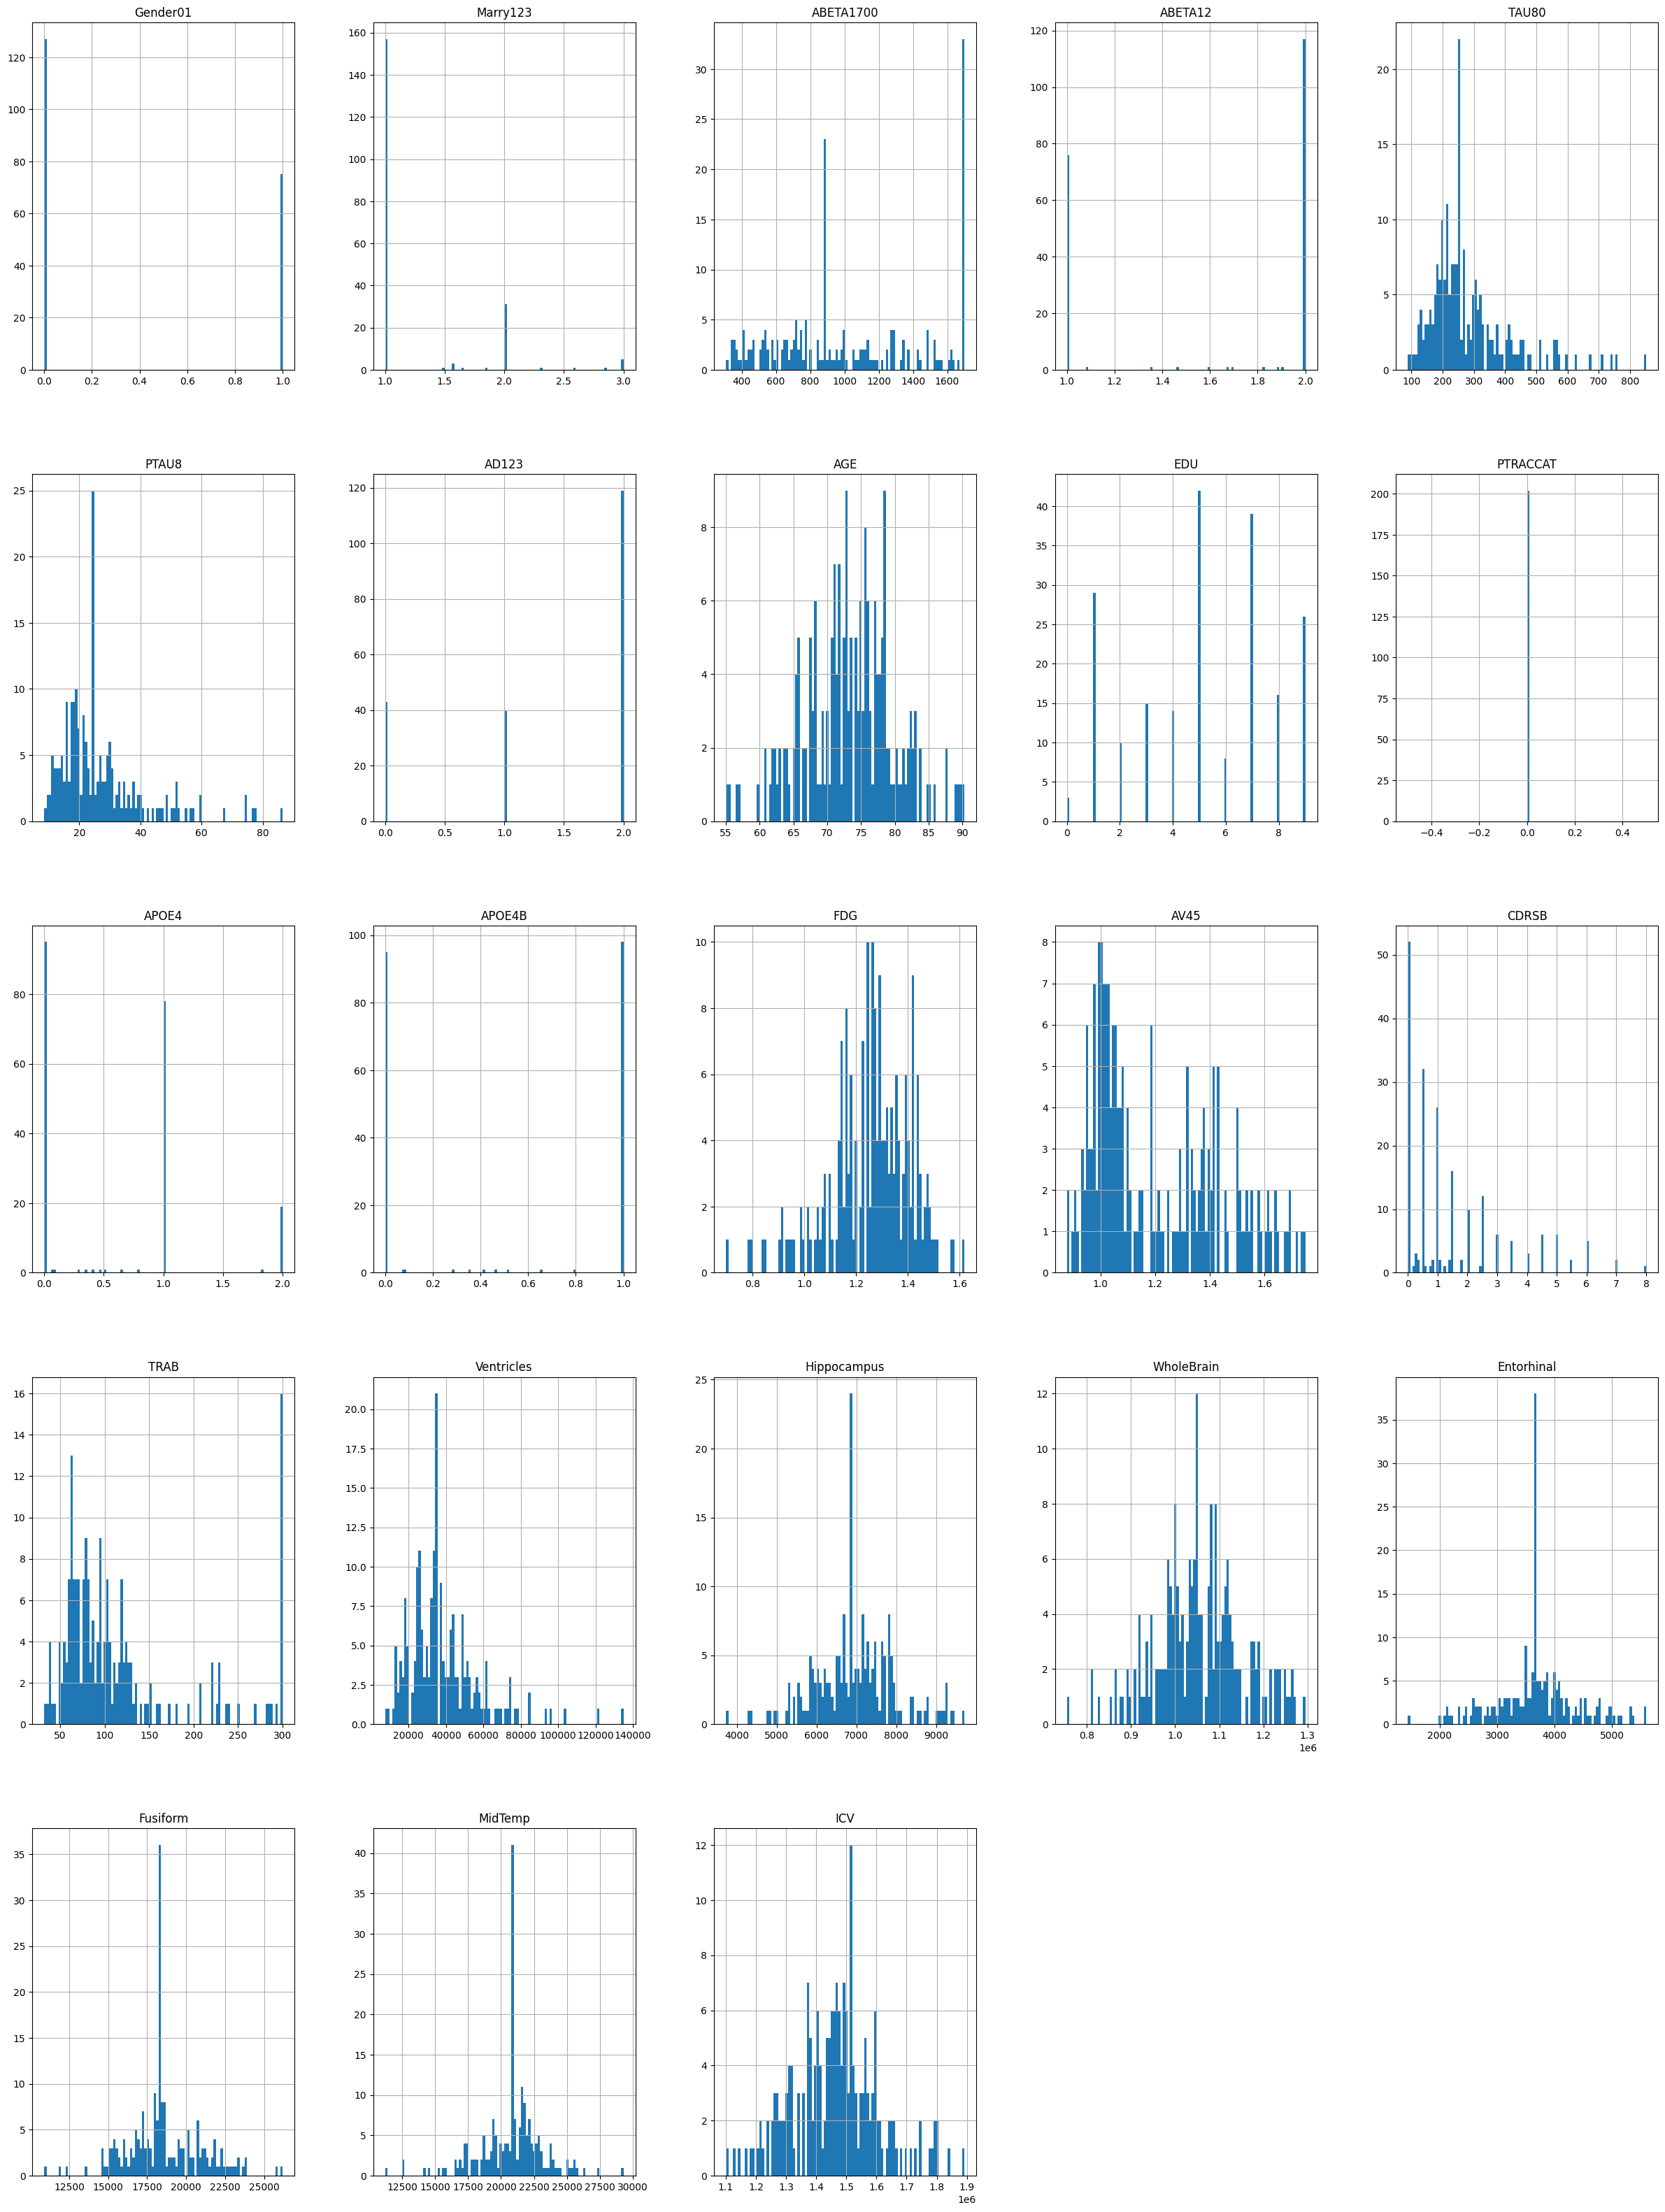

In [ ]:
X_resampled.hist(figsize=(30, 40), bins=100, xlabelsize=10, ylabelsize=10);

count    202.000000
mean      73.344705
std        6.683206
min       55.000000
25%       68.900000
50%       73.451573
75%       77.675000
max       90.300000
Name: AGE, dtype: float64


<ipython-input-48-7b9577160f25>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'], color='blue', bins=100, hist_kws={'alpha': 0.3});


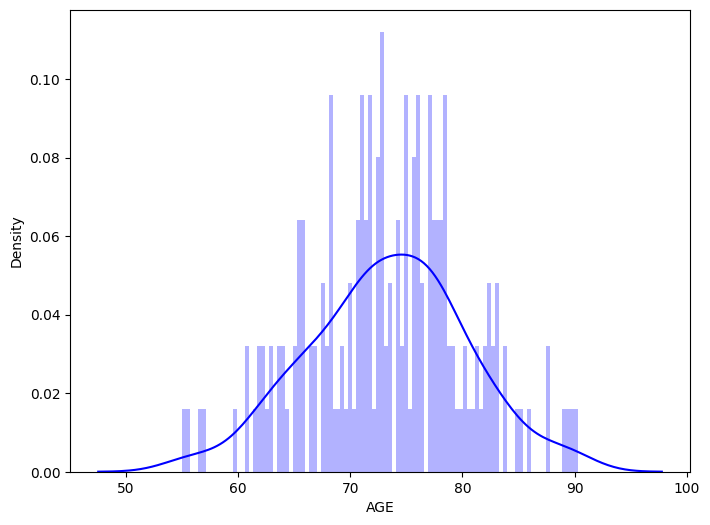

In [ ]:
print(X_resampled['AGE'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(df['AGE'], color='blue', bins=100, hist_kws={'alpha': 0.3});

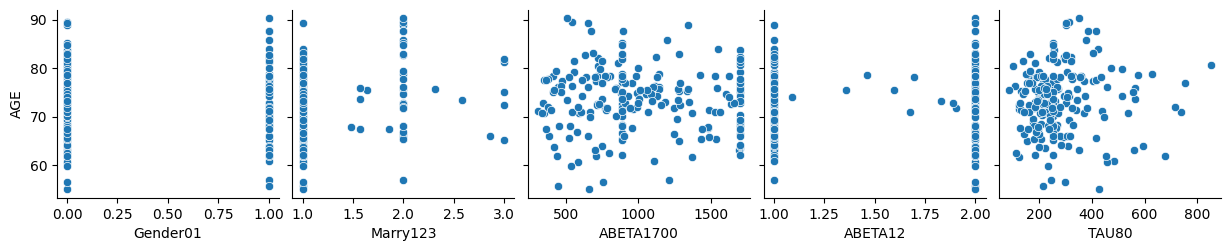

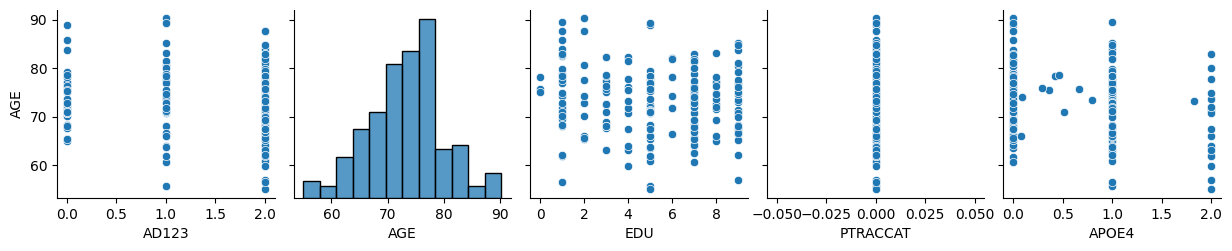

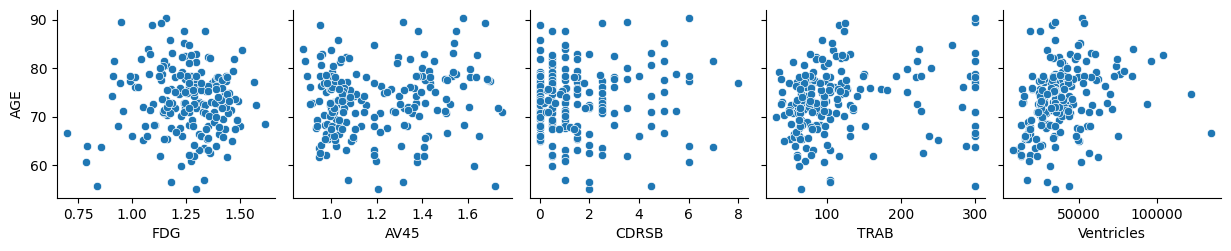

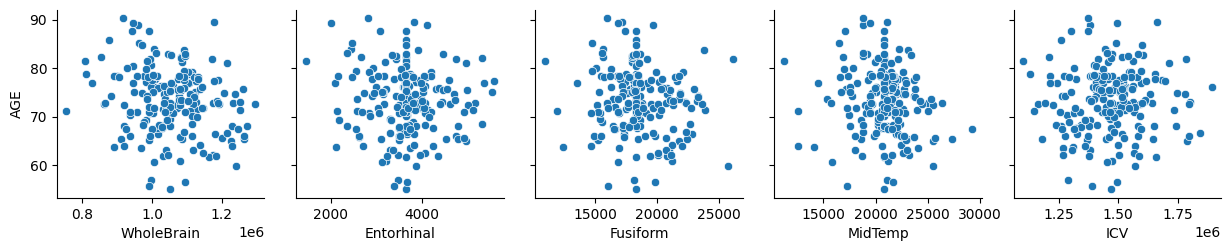

In [ ]:
for i in range(0, len(X_resampled.columns), 6):
    sns.pairplot(data=X_resampled,
                x_vars=X_resampled.columns[i:i+5],
                y_vars=['AGE'])

**EDU**

count    202.000000
mean       5.163366
std        2.659451
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: EDU, dtype: float64


<ipython-input-50-300dc2a41192>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_resampled['EDU'], color='blue', bins=100, hist_kws={'alpha': 0.3});


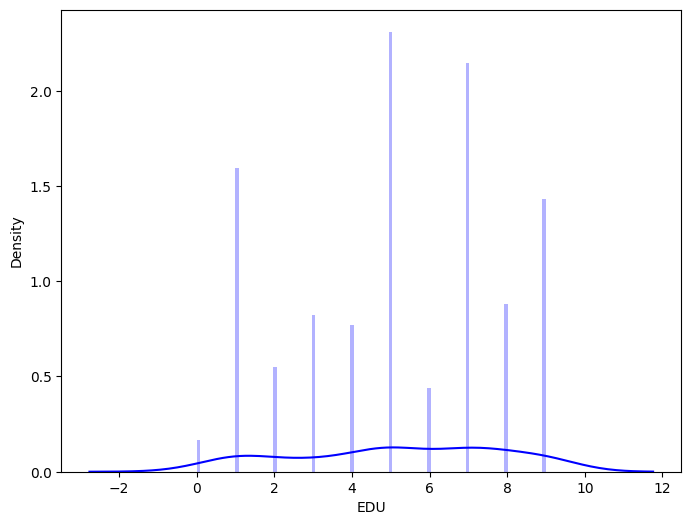

In [ ]:
print(X_resampled['EDU'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(X_resampled['EDU'], color='blue', bins=100, hist_kws={'alpha': 0.3});

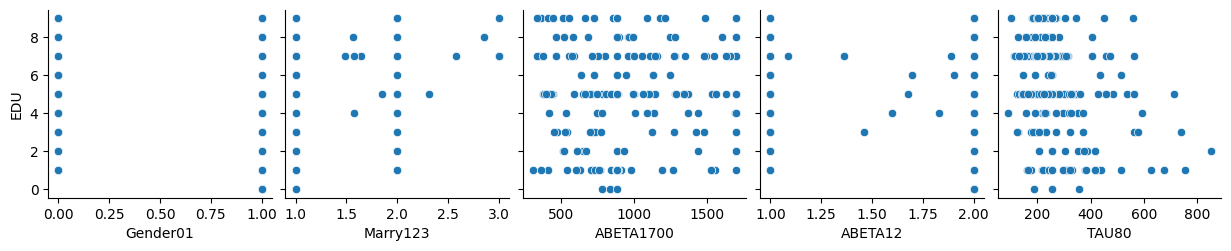

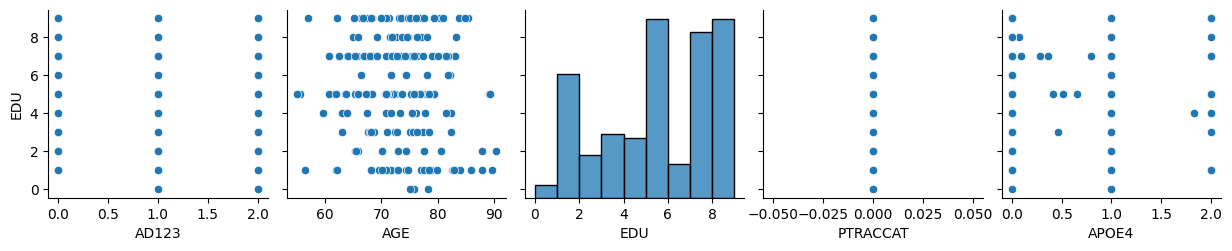

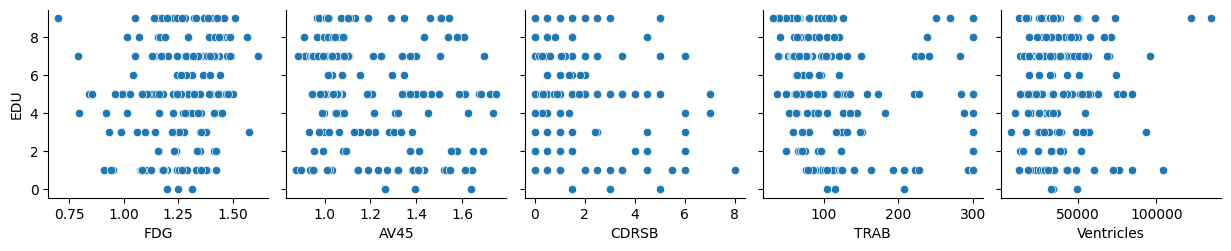

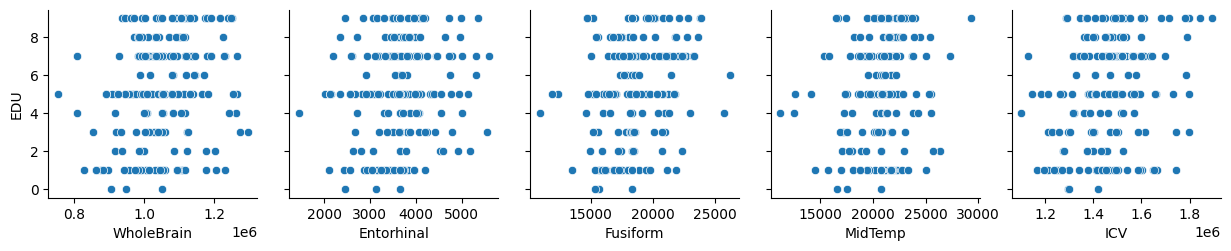

In [ ]:
for i in range(0, len(X_resampled.columns), 6):
    sns.pairplot(data=X_resampled,
                x_vars=X_resampled.columns[i:i+5],
                y_vars=['EDU'])

**Gender01**

count    202.000000
mean       0.371287
std        0.484349
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Gender01, dtype: float64


<ipython-input-52-6ea6cbe28e4c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_resampled['Gender01'], color='red', bins=100, hist_kws={'alpha': 0.3});


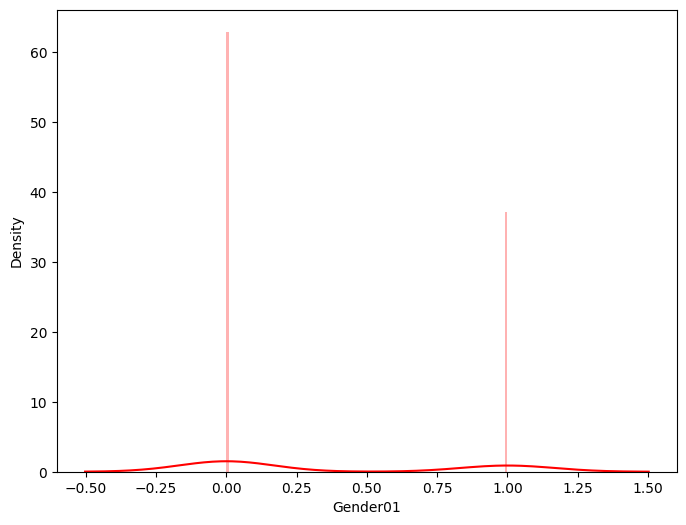

In [ ]:
print(X_resampled['Gender01'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(X_resampled['Gender01'], color='red', bins=100, hist_kws={'alpha': 0.3});

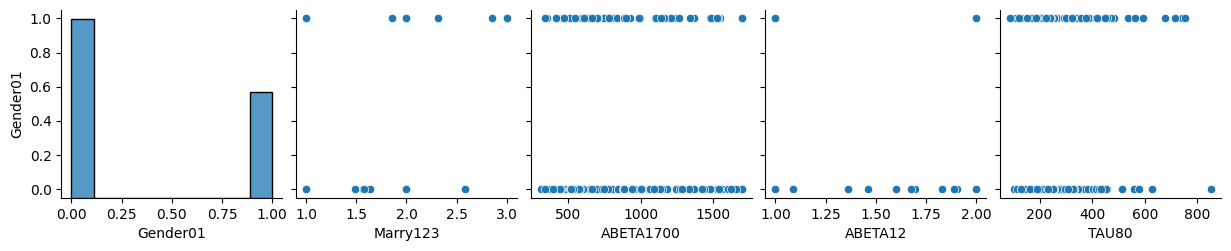

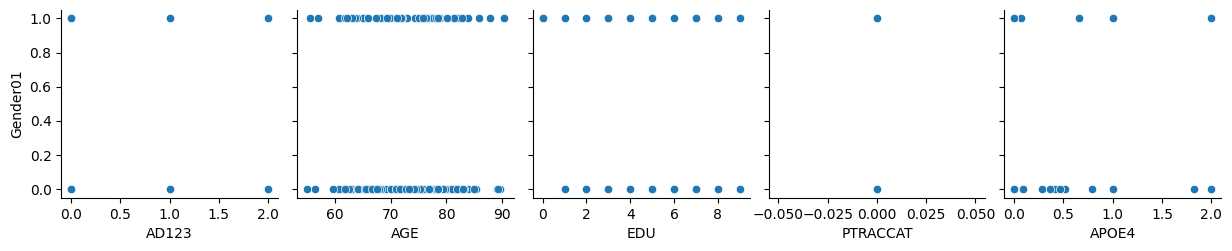

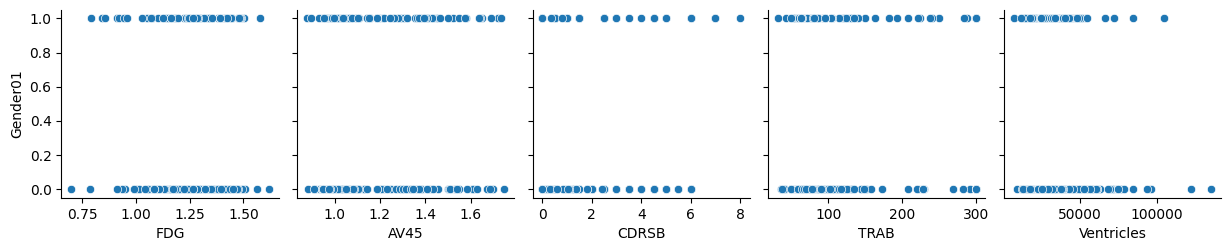

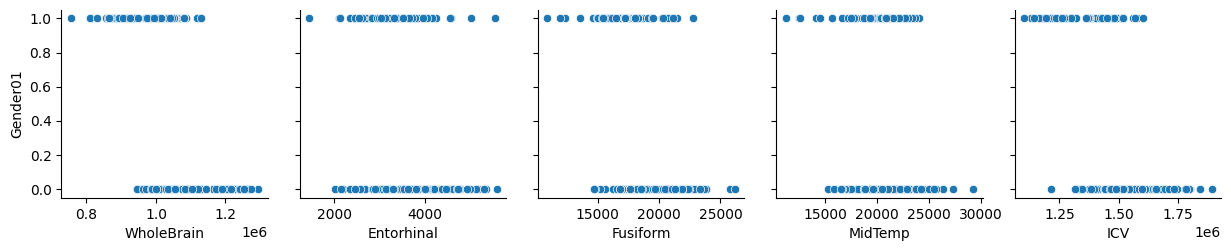

In [ ]:
for i in range(0, len(X_resampled.columns), 6):
    sns.pairplot(data=X_resampled,
                x_vars=X_resampled.columns[i:i+5],
                y_vars=['Gender01'])

**AOPE4**

count    202.000000
mean       0.601365
std        0.654961
min        0.000000
25%        0.000000
50%        0.486268
75%        1.000000
max        2.000000
Name: APOE4, dtype: float64


<ipython-input-54-11c7abf07a55>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_resampled['APOE4'], color='g', bins=100, hist_kws={'alpha': 0.3});


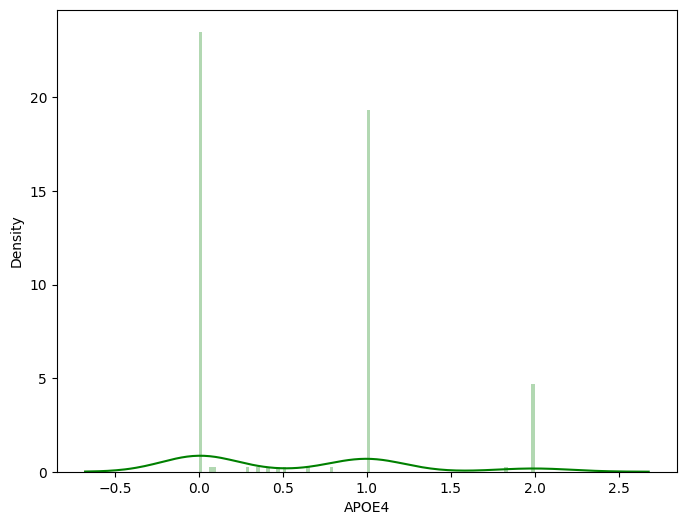

In [ ]:
print(X_resampled['APOE4'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(X_resampled['APOE4'], color='g', bins=100, hist_kws={'alpha': 0.3});

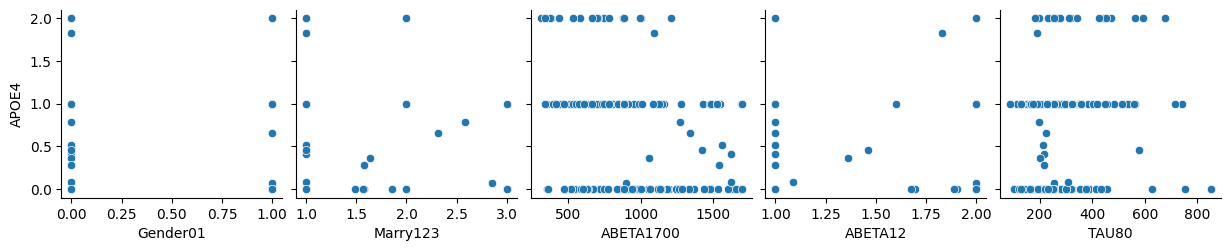

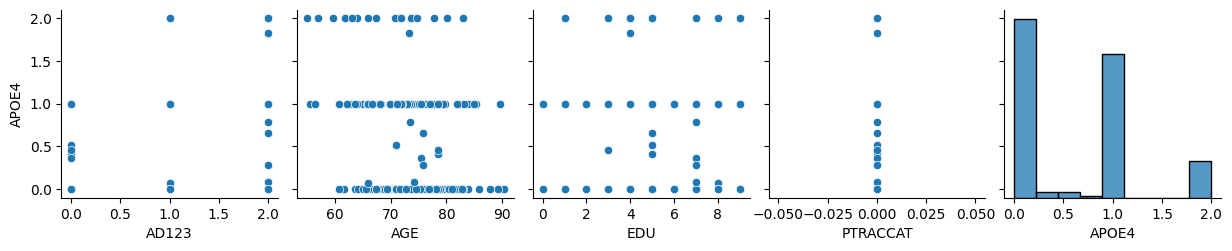

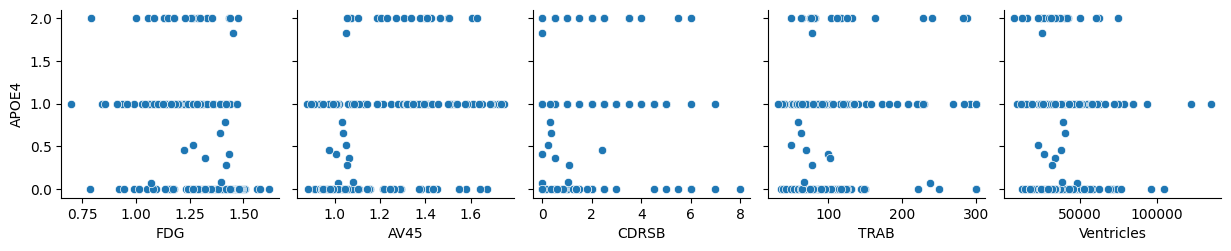

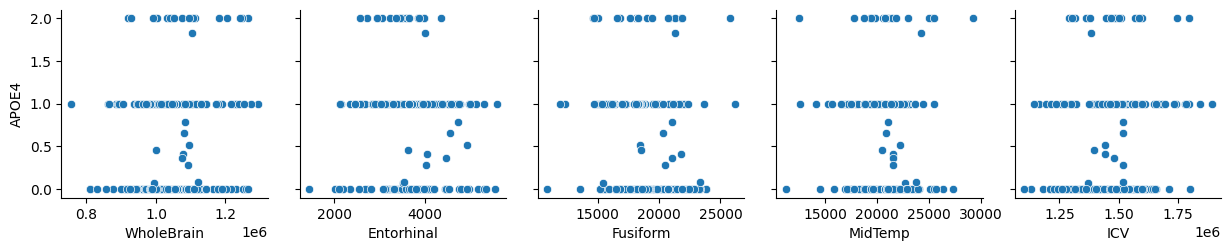

In [ ]:
for i in range(0, len(X_resampled.columns), 6):
    sns.pairplot(data=X_resampled,
                x_vars=X_resampled.columns[i:i+5],
                y_vars=['APOE4'])

**APOE4B**

count    202.000000
mean       0.503205
std        0.492647
min        0.000000
25%        0.000000
50%        0.486268
75%        1.000000
max        1.000000
Name: APOE4B, dtype: float64


<ipython-input-56-11bc066f231d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_resampled['APOE4B'], color='purple', bins=100, hist_kws={'alpha': 0.3});


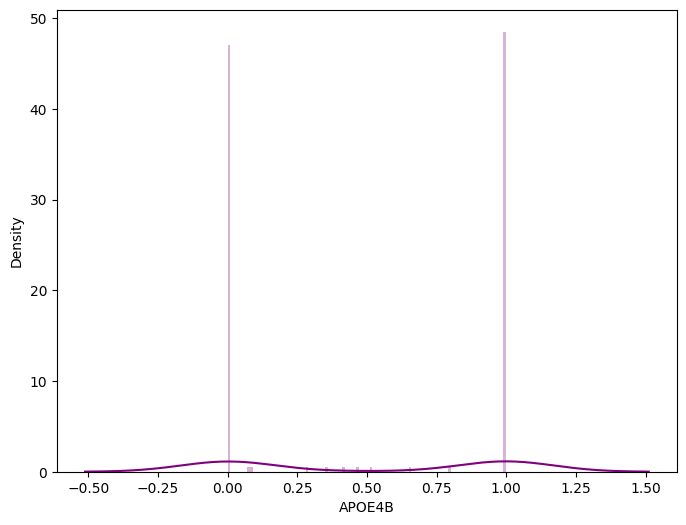

In [ ]:
print(X_resampled['APOE4B'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(X_resampled['APOE4B'], color='purple', bins=100, hist_kws={'alpha': 0.3});

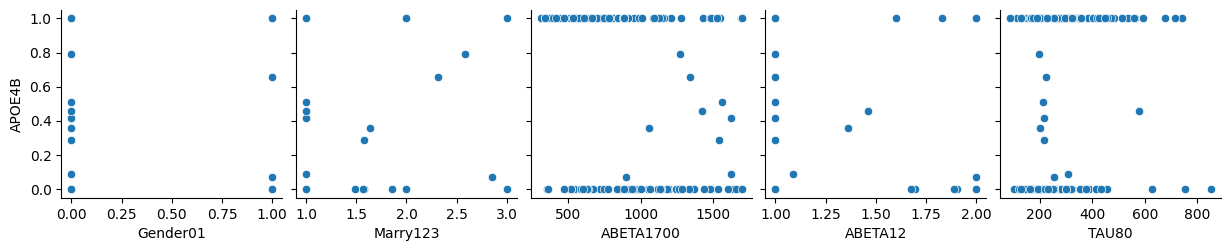

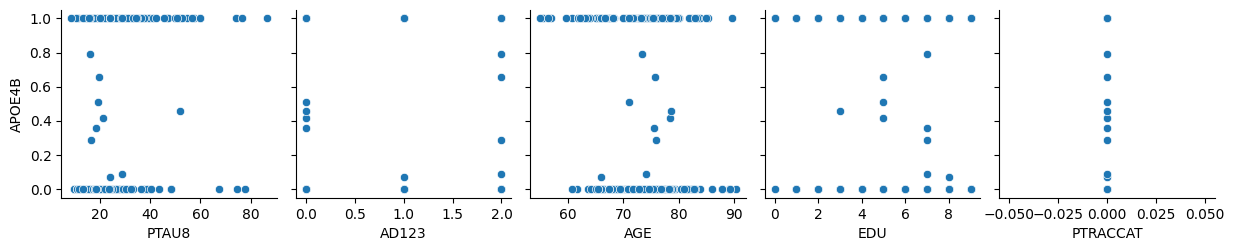

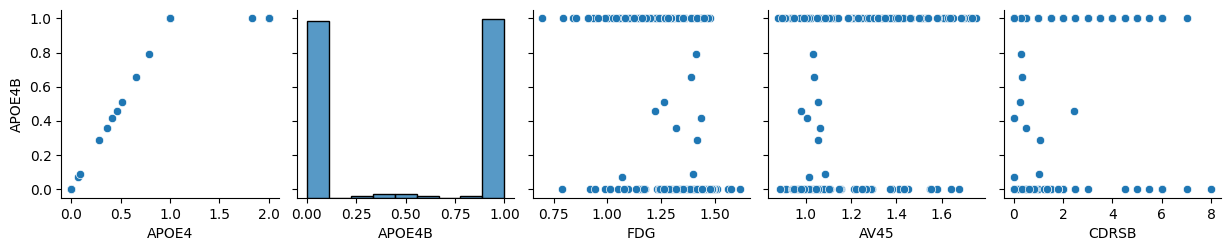

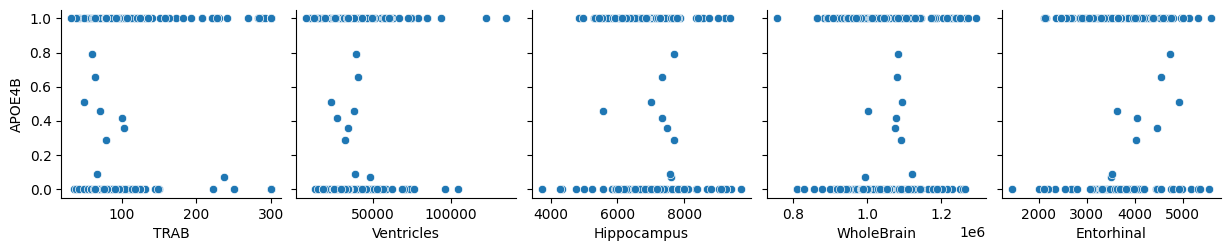

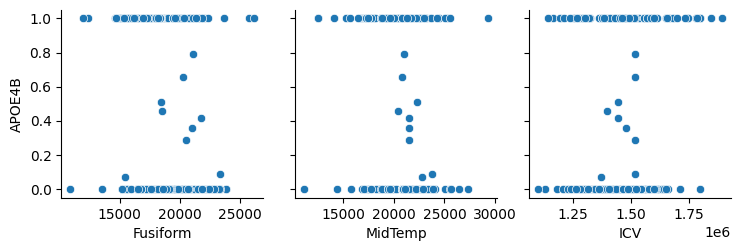

In [ ]:
for i in range(0, len(X_resampled.columns), 5):
    sns.pairplot(data=X_resampled,
                x_vars=X_resampled.columns[i:i+5],
                y_vars=['APOE4B'])

**TAU80**

count    202.000000
mean     281.237104
std      128.580283
min       88.690000
25%      201.284349
50%      253.200000
75%      320.075000
max      851.600000
Name: TAU80, dtype: float64


<ipython-input-58-c19d3801cee3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_resampled['TAU80'], color='Black', bins=100, hist_kws={'alpha': 0.3});


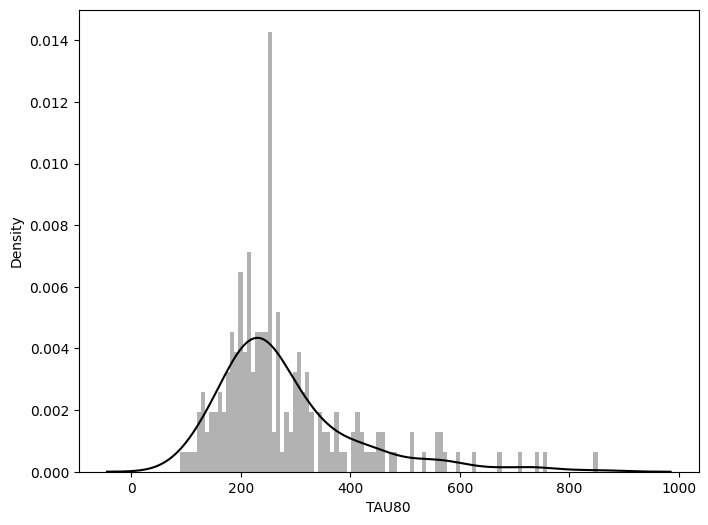

In [ ]:
print(X_resampled['TAU80'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(X_resampled['TAU80'], color='Black', bins=100, hist_kws={'alpha': 0.3});

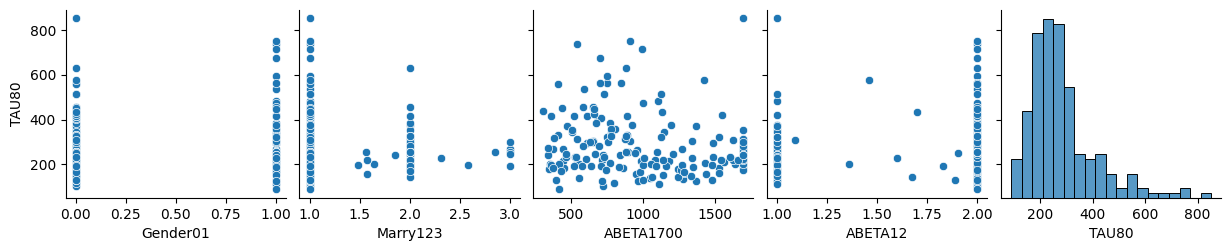

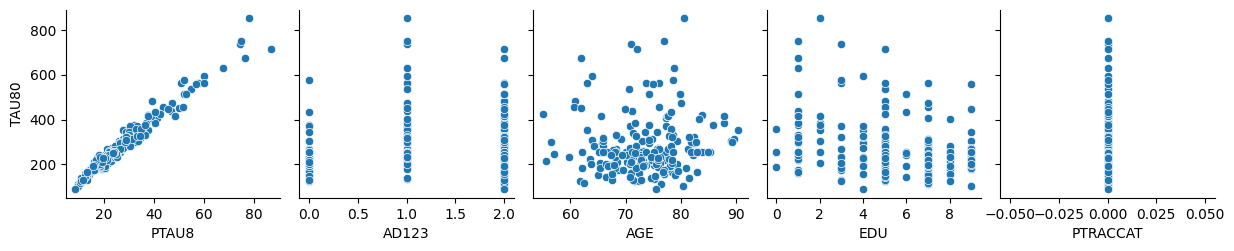

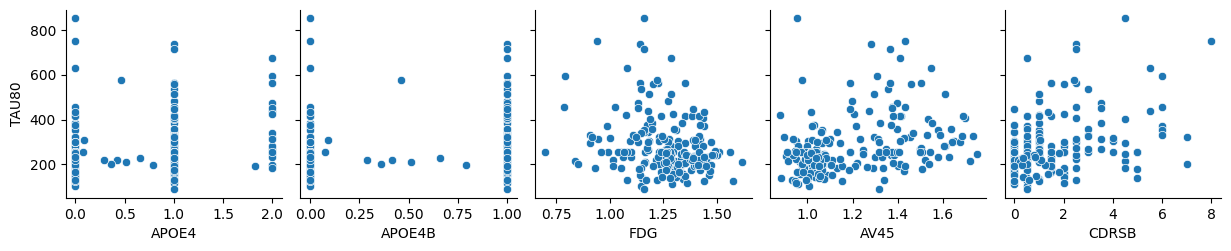

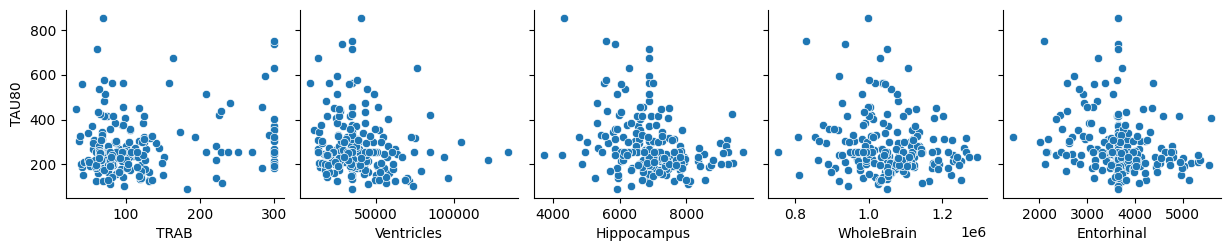

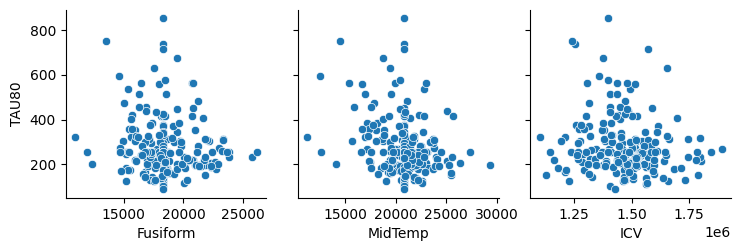

In [ ]:
for i in range(0, len(X_resampled.columns), 5):
    sns.pairplot(data=X_resampled,
                x_vars=X_resampled.columns[i:i+5],
                y_vars=['TAU80'])

**PTAU8**

count    202.000000
mean      26.720216
std       13.903107
min        8.530000
25%       17.879723
50%       24.150000
75%       30.450000
max       86.510000
Name: PTAU8, dtype: float64


<ipython-input-60-7bb7d5934ebd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PTAU8'], color='black', bins=100, hist_kws={'alpha': 0.3});


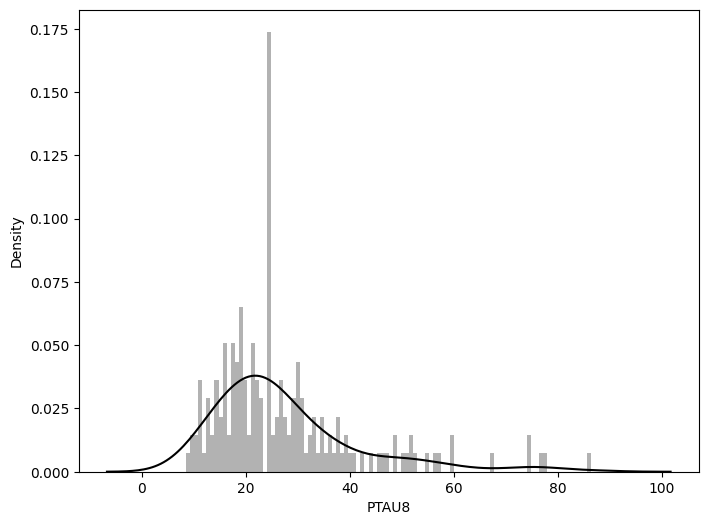

In [ ]:
print(X_resampled['PTAU8'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(df['PTAU8'], color='black', bins=100, hist_kws={'alpha': 0.3});

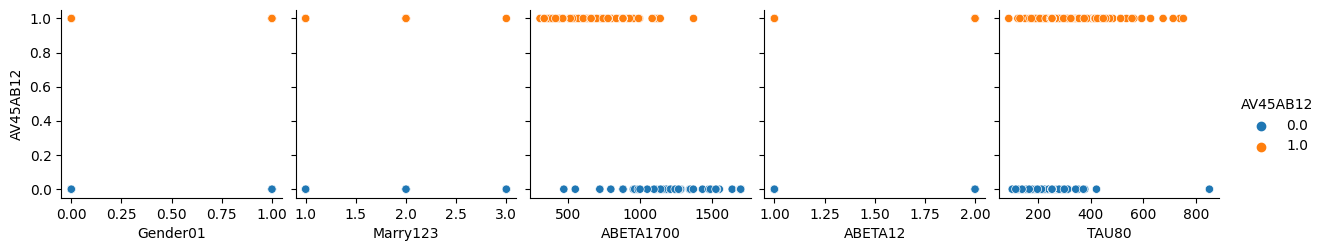

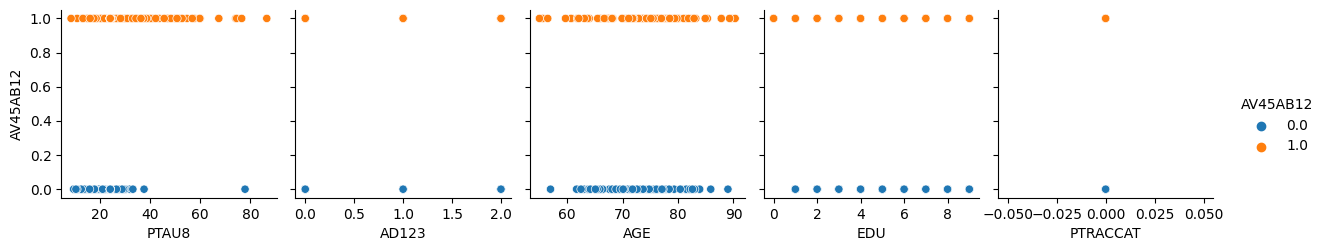

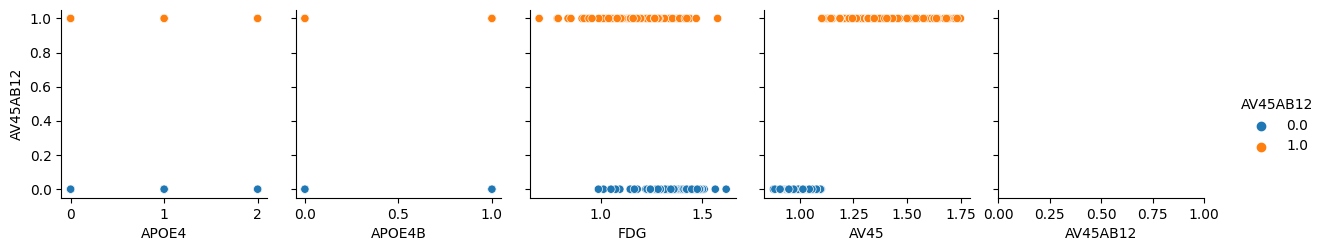

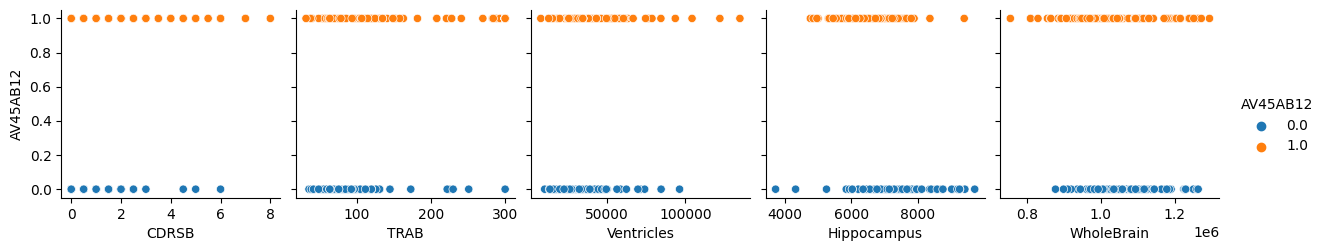

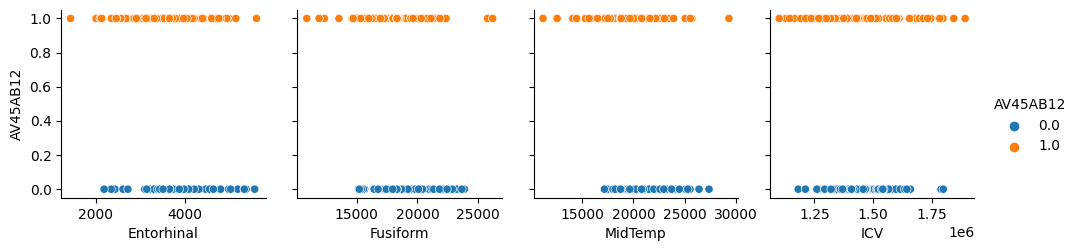

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['AV45AB12'],
                hue = 'AV45AB12')

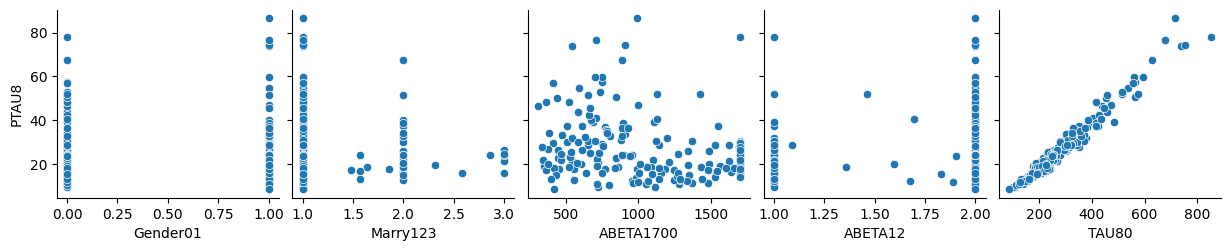

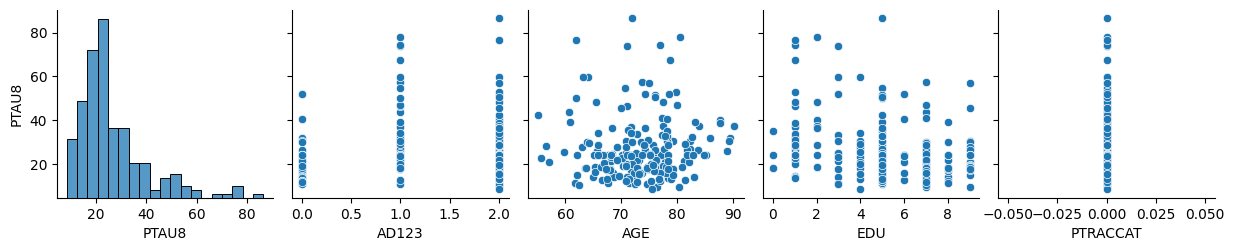

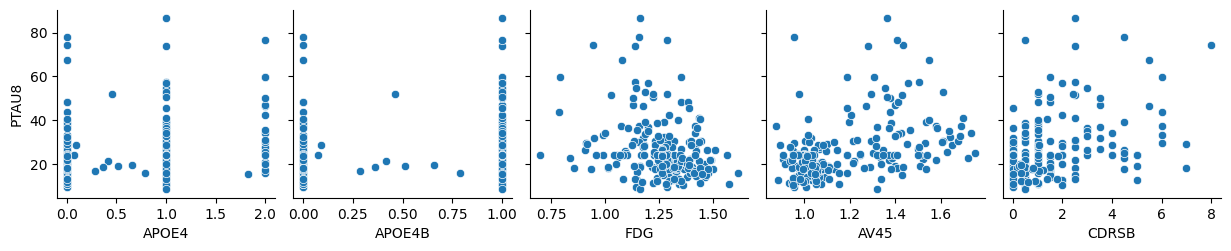

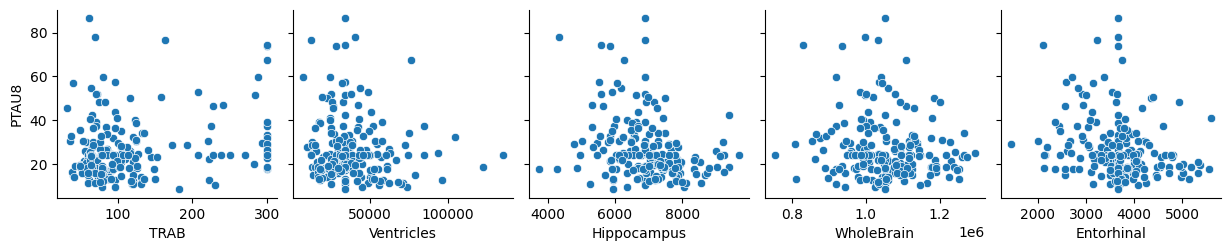

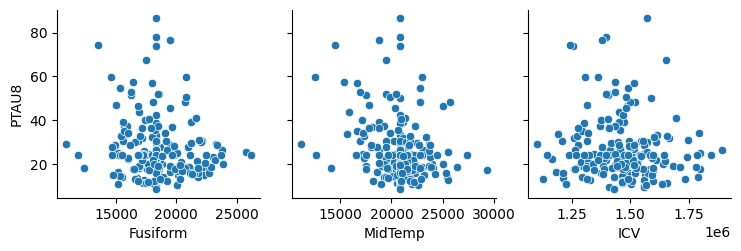

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=X_resampled,
                x_vars=X_resampled.columns[i:i+5],
                y_vars=['PTAU8'])

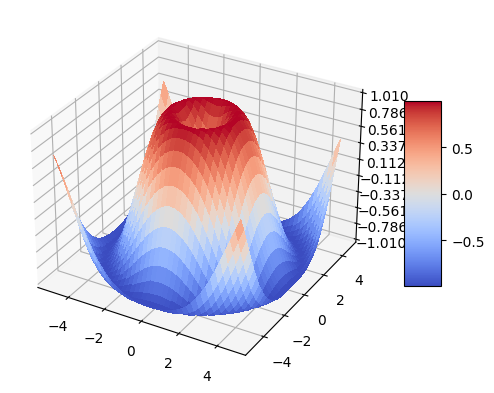

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
plt.savefig("plot.svg", format="svg", transparent=True)

**Label**

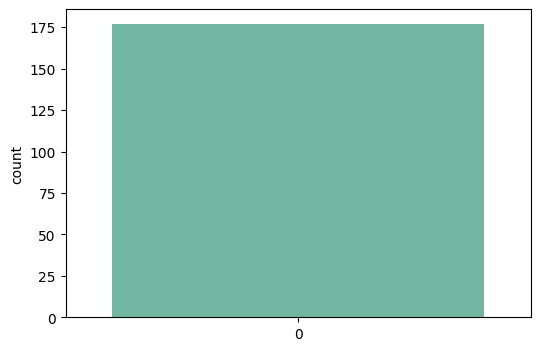

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['AV45AB12'], palette = "Set2", )
plt.savefig("countplot_t.png", format="png", transparent=True)

**AV45AB12**

In [ ]:
X_resampled.isnull().any()

Gender01       False
Marry123       False
ABETA1700      False
ABETA12        False
TAU80          False
PTAU8          False
AD123          False
AGE            False
EDU            False
PTRACCAT       False
APOE4          False
APOE4B         False
FDG            False
AV45           False
CDRSB          False
TRAB           False
Ventricles     False
Hippocampus    False
WholeBrain     False
Entorhinal     False
Fusiform       False
MidTemp        False
ICV            False
dtype: bool

In [ ]:
X_resampled.value_counts()

Gender01  Marry123  ABETA1700    ABETA12  TAU80       PTAU8      AD123  AGE        EDU  PTRACCAT  APOE4  APOE4B  FDG       AV45      CDRSB     TRAB        Ventricles    Hippocampus  WholeBrain    Entorhinal   Fusiform      MidTemp       ICV         
0         1.0       308.500000   2.0      440.000000  46.730000  1      71.100000  1    0         2.0    1.0     1.177442  1.271303  5.500000  228.000000  26738.000000  5629.000000  1.107748e+06  2570.000000  16849.000000  25031.000000  1.485591e+06    1
1         1.0       638.600000   2.0      190.900000  15.850000  2      78.100000  6    0         0.0    0.0     1.395529  1.152525  0.500000  80.000000   50872.000000  6934.000000  1.119237e+06  3553.000000  21498.000000  21754.000000  1.576596e+06    1
                    351.400000   2.0      203.400000  19.090000  0      70.800000  7    0         0.0    0.0     1.339204  1.103826  0.000000  61.000000   25048.000000  6918.000000  9.931256e+05  3509.000000  16919.000000  19119.000000  1.3

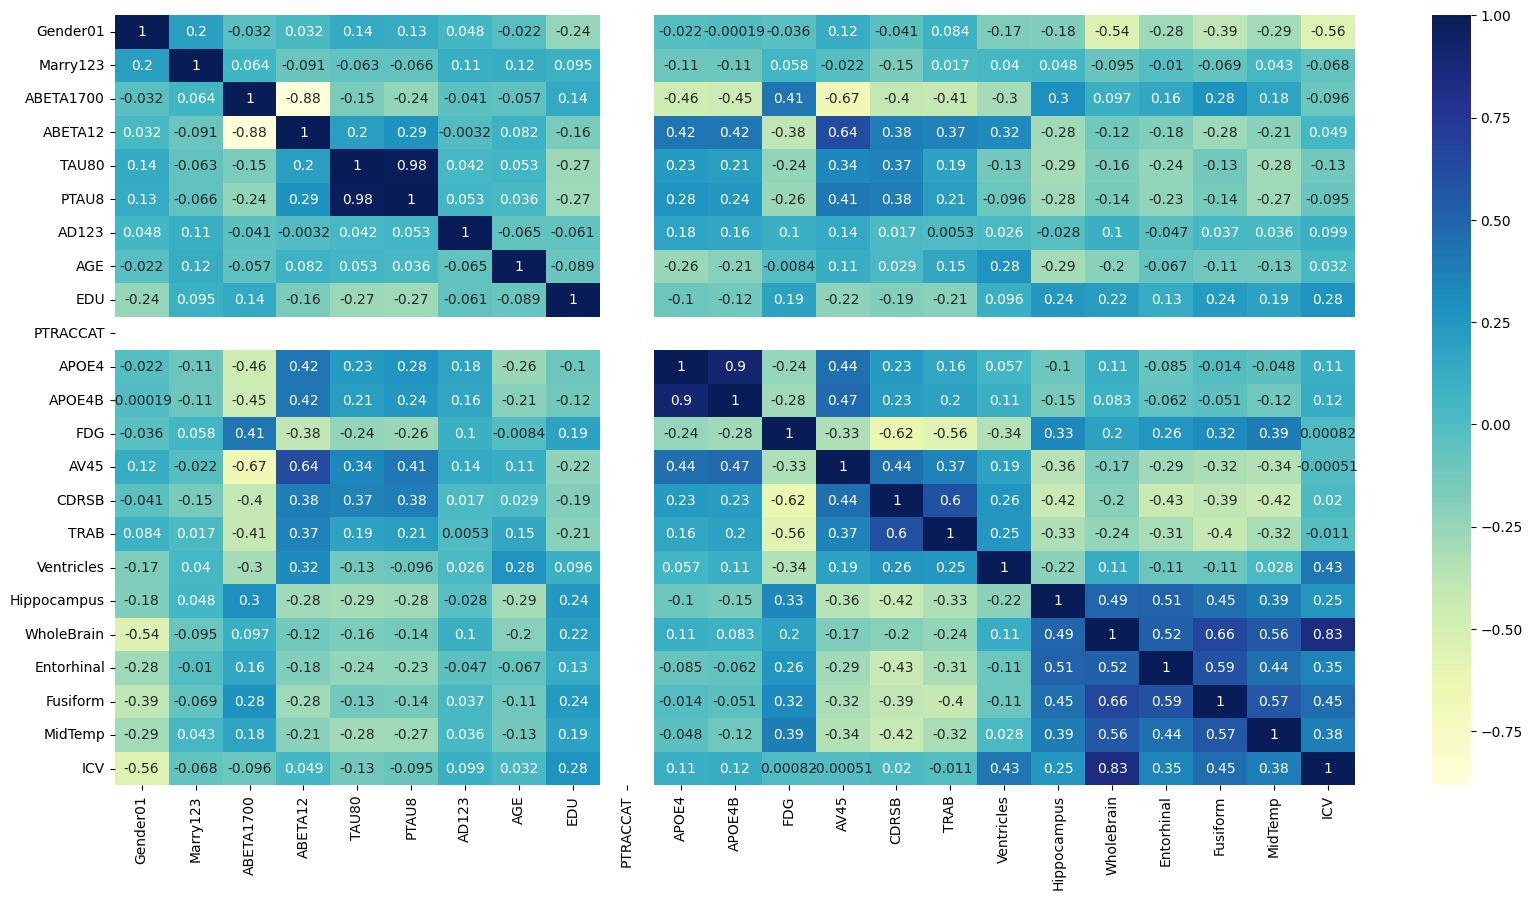

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
corr = X_resampled.corr()
sns.heatmap(corr,annot=True , cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
select_feature = SelectKBest(score_func=chi2, k =20)
select_feature.fit(x_final, y_final)

SelectKBest(k=20, score_func=<function chi2 at 0x7e4605ce0d30>)

In [ ]:
score = pd.DataFrame(select_feature.scores_, columns = ['value'])
score

,value
0,3.853333
1,0.902460
2,22.402875
3,39.431443
4,2.767911
5,4.885367
6,0.870504
7,0.038287
8,1.772771
9,NaN


In [ ]:
#categorical_features_nan_dataframe = pd.DataFrame({'Null_Value':db[categorical_features_nan].isnull().sum()})
#categorical_features_nan_dataframe

In [ ]:
col = pd.DataFrame(x_final.columns)
col

,0
0,Gender01
1,Marry123
2,ABETA1700
3,ABETA12
4,TAU80
5,PTAU8
6,AD123
7,AGE
8,EDU
9,PTRACCAT


In [ ]:
selected_feat = x_final.columns[(select_feature.get_support())]

In [ ]:
selected_feat.shape

(20,)

In [ ]:
x_train = x_final[selected_feat]
x_train

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,EDU,APOE4,APOE4B,FDG,AV45,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp
0,0.0,0.000000,1.000000,0.000000,0.196498,0.176071,0.0,0.777778,0.000000,0.000000,0.756851,0.034229,0.000000,0.291045,0.201879,0.688893,0.558656,0.514692,0.414897,0.589175
1,0.0,0.000000,1.000000,0.000000,0.284319,0.279302,0.0,1.000000,0.000000,0.000000,0.676969,0.145030,0.000000,0.014925,0.246036,0.593567,0.667267,0.664981,0.734466,0.569051
2,0.0,0.500000,0.744880,0.000000,0.283271,0.225955,0.0,0.555556,0.000000,0.000000,0.431478,0.082794,0.000000,0.317164,0.197589,0.456525,0.382178,0.643064,0.576740,0.417570
3,0.0,0.000000,0.749910,0.000000,0.128469,0.083098,0.0,0.777778,0.000000,0.000000,0.665559,0.155546,0.000000,0.029851,0.052705,0.831630,0.685248,0.722543,0.744267,0.570378
4,1.0,0.500000,0.636364,0.000000,0.378564,0.300462,0.0,0.111111,0.000000,0.000000,0.519412,0.176360,0.000000,0.231343,0.210764,0.416485,0.226532,0.532274,0.485299,0.530600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,0.000000,0.947945,0.088757,0.288017,0.261423,1.0,0.777778,0.044378,0.088757,0.760730,0.235766,0.130547,0.129935,0.242763,0.644701,0.676714,0.504061,0.813696,0.694839
198,0.0,0.000000,0.702007,0.000000,0.099259,0.061882,1.0,0.555556,0.000000,0.000000,0.678509,0.117929,0.224108,0.218598,0.354741,0.577807,0.553293,0.610693,0.506156,0.646811
199,0.0,0.000000,0.801220,0.460238,0.639006,0.557962,0.0,0.333333,0.230119,0.460238,0.568824,0.114926,0.303616,0.143212,0.238277,0.309242,0.456881,0.527951,0.496470,0.511123
200,1.0,0.658352,0.744040,0.000000,0.180691,0.140706,1.0,0.555556,0.329176,0.658352,0.753233,0.181952,0.042706,0.117970,0.260046,0.603511,0.603160,0.748870,0.615184,0.532657


In [ ]:
y_train = y_final
y_train

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
197    0.0
198    0.0
199    0.0
200    0.0
201    0.0
Name: AV45AB12, Length: 202, dtype: float64

In [ ]:
top_features =  pd.concat([x_train,y_train],axis = 1)
top_features

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,AD123,EDU,APOE4,APOE4B,...,AV45,CDRSB,TRAB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,AV45AB12
0,0.0,0.000000,1.000000,0.000000,0.196498,0.176071,0.0,0.777778,0.000000,0.000000,...,0.034229,0.000000,0.291045,0.201879,0.688893,0.558656,0.514692,0.414897,0.589175,0.0
1,0.0,0.000000,1.000000,0.000000,0.284319,0.279302,0.0,1.000000,0.000000,0.000000,...,0.145030,0.000000,0.014925,0.246036,0.593567,0.667267,0.664981,0.734466,0.569051,0.0
2,0.0,0.500000,0.744880,0.000000,0.283271,0.225955,0.0,0.555556,0.000000,0.000000,...,0.082794,0.000000,0.317164,0.197589,0.456525,0.382178,0.643064,0.576740,0.417570,0.0
3,0.0,0.000000,0.749910,0.000000,0.128469,0.083098,0.0,0.777778,0.000000,0.000000,...,0.155546,0.000000,0.029851,0.052705,0.831630,0.685248,0.722543,0.744267,0.570378,0.0
4,1.0,0.500000,0.636364,0.000000,0.378564,0.300462,0.0,0.111111,0.000000,0.000000,...,0.176360,0.000000,0.231343,0.210764,0.416485,0.226532,0.532274,0.485299,0.530600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,0.000000,0.947945,0.088757,0.288017,0.261423,1.0,0.777778,0.044378,0.088757,...,0.235766,0.130547,0.129935,0.242763,0.644701,0.676714,0.504061,0.813696,0.694839,0.0
198,0.0,0.000000,0.702007,0.000000,0.099259,0.061882,1.0,0.555556,0.000000,0.000000,...,0.117929,0.224108,0.218598,0.354741,0.577807,0.553293,0.610693,0.506156,0.646811,0.0
199,0.0,0.000000,0.801220,0.460238,0.639006,0.557962,0.0,0.333333,0.230119,0.460238,...,0.114926,0.303616,0.143212,0.238277,0.309242,0.456881,0.527951,0.496470,0.511123,0.0
200,1.0,0.658352,0.744040,0.000000,0.180691,0.140706,1.0,0.555556,0.329176,0.658352,...,0.181952,0.042706,0.117970,0.260046,0.603511,0.603160,0.748870,0.615184,0.532657,0.0


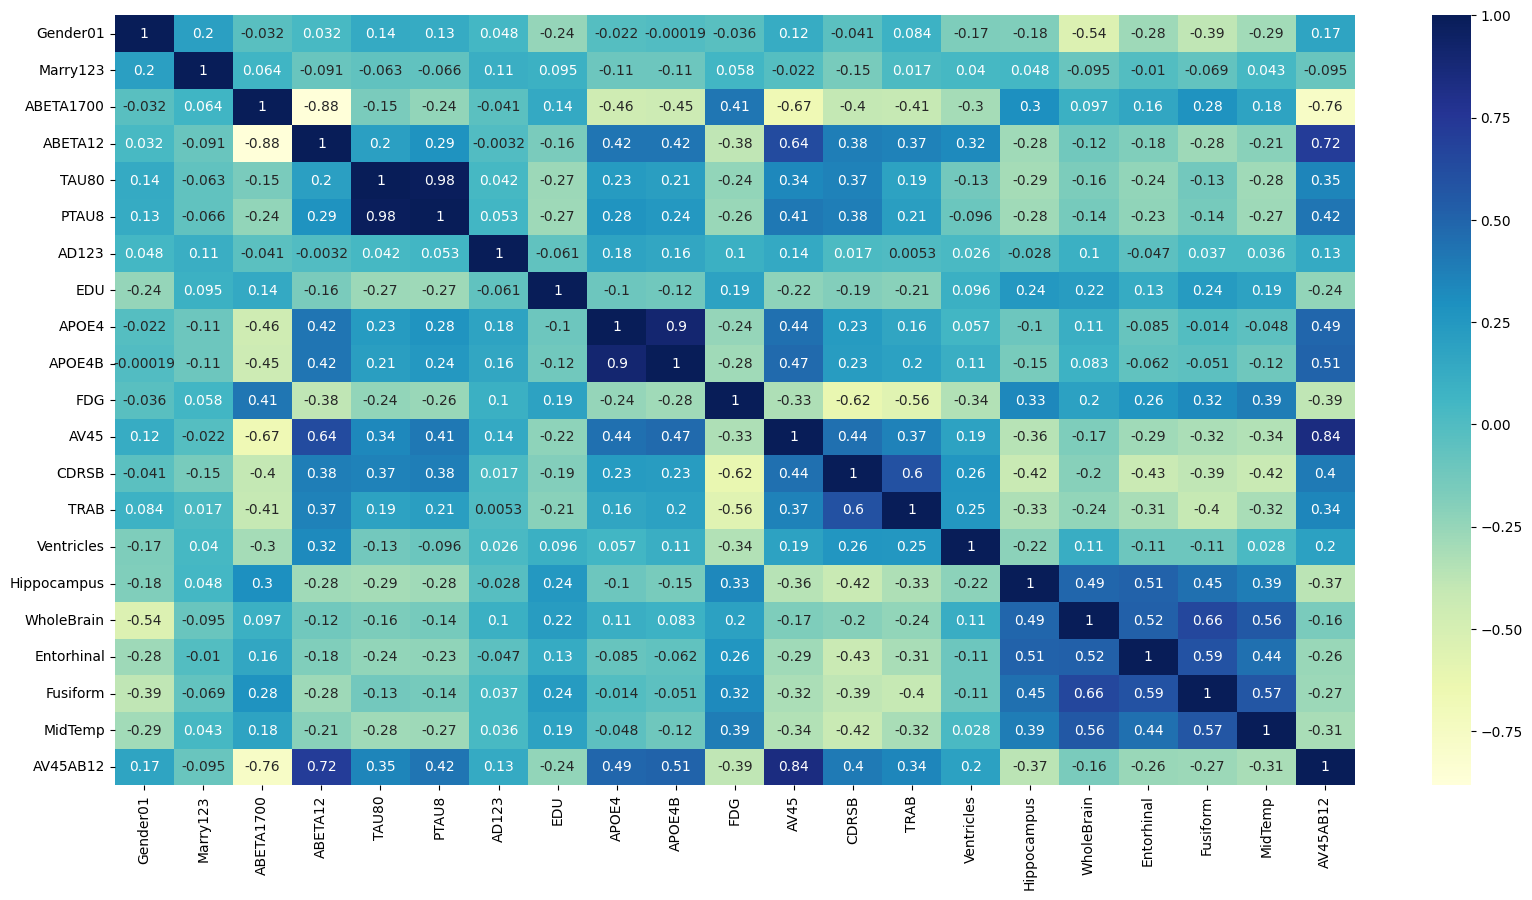

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
corr = top_features.corr()
sns.heatmap(corr,annot=True , cmap="YlGnBu")
plt.show()
plt.savefig("heatmap_t.svg", format="svg", transparent=True)

In [ ]:
top_fe = pd.concat([col,score],axis = 1)
top_fe

,0,value
0,Gender01,3.853333
1,Marry123,0.902460
2,ABETA1700,22.402875
3,ABETA12,39.431443
4,TAU80,2.767911
5,PTAU8,4.885367
6,AD123,0.870504
7,AGE,0.038287
8,EDU,1.772771
9,PTRACCAT,NaN


In [ ]:
top = top_fe.nlargest(20, 'value')
top

,0,value
3,ABETA12,39.431443
13,AV45,26.119851
11,APOE4B,24.942854
2,ABETA1700,22.402875
10,APOE4,17.136697
14,CDRSB,8.226275
15,TRAB,5.680937
5,PTAU8,4.885367
0,Gender01,3.853333
4,TAU80,2.767911


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
#k_fold

In [ ]:
#for train_index,test_index in k_fold.split([0,1,2,3,4,5,6,7,8,9]):
  #print(train_index, test_index)

In [ ]:
#def get_score(model,x_train, x_test, y_train, y_test):
  #model.fit(x_train, y_train)
  #return model.score(x_test,y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_train,y_train, test_size = .25, random_state = 34)

In [ ]:
x_final, y_final = make_classification(random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(xtest, ytest)

0.9607843137254902

In [ ]:
pred_logreg = logreg.predict(xtest)
pred_logreg

array([0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.])

In [ ]:
print(classification_report(ytest, logreg.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        21
         1.0       1.00      0.93      0.97        30

    accuracy                           0.96        51
   macro avg       0.96      0.97      0.96        51
weighted avg       0.96      0.96      0.96        51



In [ ]:
round(np.mean(score)*100,2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


value    750.67
dtype: float64

In [ ]:
log = logreg.predict(x_train)
log

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
cm = confusion_matrix(ytest, pred_logreg)

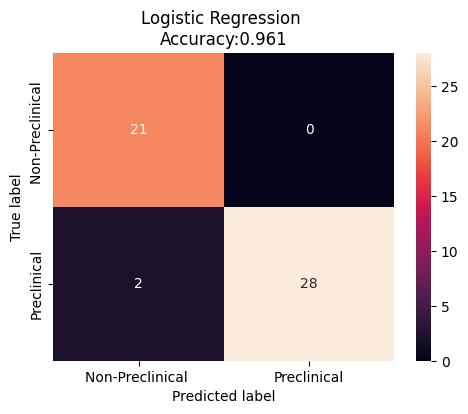

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Non-Preclinical ', 'Preclinical'],
                     columns = ['Non-Preclinical ', 'Preclinical'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(ytest, pred_logreg)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma = 'auto')
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8823529411764706

In [ ]:
pred_model = model.predict(xtest)
pred_model

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.])

In [ ]:
print(classification_report(ytest, model.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87        21
         1.0       0.96      0.83      0.89        30

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.90      0.88      0.88        51



In [ ]:
round(np.mean(score)*100,2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


value    750.67
dtype: float64

In [ ]:
sup = model.predict(x_train)
sup

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
y_pred_svm = model.decision_function(xtest)

In [ ]:
y_pred_svm

array([-0.63525298, -1.03854478, -0.30634911,  0.44798812,  1.0423798 ,
        1.09971334,  0.12671677, -0.89595936, -0.40141409, -1.18370241,
       -1.85268354,  1.48396763, -0.2196553 ,  0.94177448,  0.74979628,
        1.40288734,  1.12943698,  0.30982015,  1.31456066,  0.57683338,
        1.00625765,  0.76278922, -1.72106965, -1.06806643, -0.0563535 ,
       -1.21572038, -0.94929335, -0.20836565,  1.34231497, -1.00295828,
       -0.92337226,  1.16931137, -1.21399162,  0.51766786, -1.18245572,
        1.2961089 ,  1.46730776,  1.19664898,  0.1047461 ,  1.07851119,
       -0.95757284, -0.71610308,  0.01599859, -0.45374228, -1.49788   ,
       -0.5735261 ,  0.58744029,  0.31769339,  0.55578613, -0.1114743 ,
       -1.81480758])

In [ ]:
cm = confusion_matrix(ytest, pred_model)

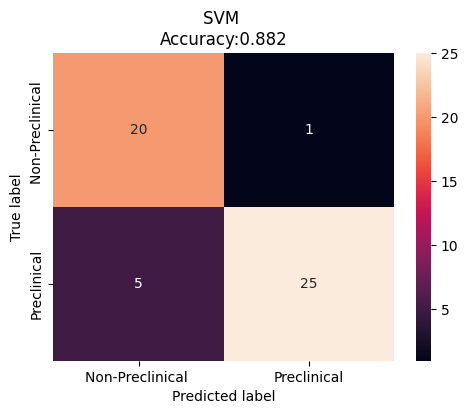

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Non-Preclinical ', 'Preclinical'],
                     columns = ['Non-Preclinical ', 'Preclinical'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM \nAccuracy:{0:.3f}'.format(accuracy_score(ytest, pred_model)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(xtrain, ytrain)
knn.score(xtest, ytest)

0.8823529411764706

In [ ]:
pred_knn = knn.predict(xtest)
pred_knn

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.])

In [ ]:
print(classification_report(ytest, knn.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        21
         1.0       0.93      0.87      0.90        30

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.89      0.88      0.88        51



In [ ]:
round(np.mean(score)*100,2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


value    750.67
dtype: float64

In [ ]:
kn = knn.predict(x_train)
kn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
cm = confusion_matrix(ytest, pred_knn)

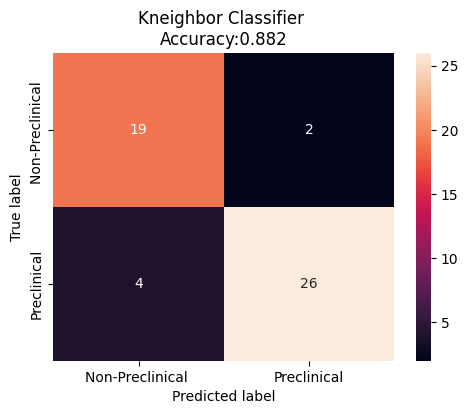

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Non-Preclinical ', 'Preclinical'],
                     columns = ['Non-Preclinical ', 'Preclinical'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Kneighbor Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(ytest, pred_knn)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(x_train, y_train)
gn.score(xtest, ytest)

0.9607843137254902

In [ ]:
pred_gn = gn.predict(xtest)
pred_gn

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.])

In [ ]:
print(classification_report(ytest, gn.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        21
         1.0       1.00      0.93      0.97        30

    accuracy                           0.96        51
   macro avg       0.96      0.97      0.96        51
weighted avg       0.96      0.96      0.96        51



In [ ]:
round(np.mean(score)*100,2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


value    750.67
dtype: float64

In [ ]:
Gn = gn.predict(x_train)
Gn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# y_pred_gn = gn.decision_function(xtest)

In [ ]:
cm = confusion_matrix(ytest, pred_gn)

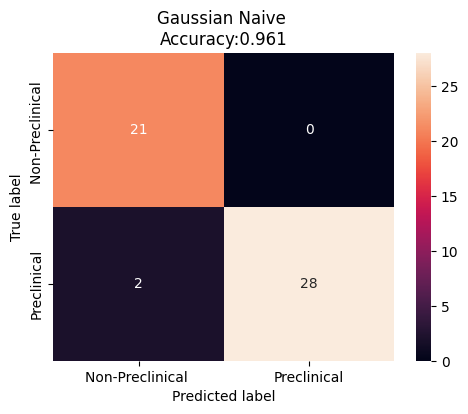

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Non-Preclinical ', 'Preclinical'],
                     columns = ['Non-Preclinical ', 'Preclinical'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Gaussian Naive \nAccuracy:{0:.3f}'.format(accuracy_score(ytest, pred_gn)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

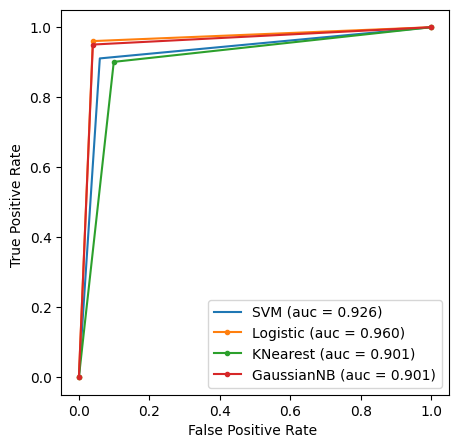

In [ ]:
from sklearn.metrics import roc_curve, auc
logistic_fpr, logistic_tpr, threshold = roc_curve(y_train, log)
auc_logistic = auc(logistic_fpr, logistic_tpr)
svm_fpr, svm_tpr, threshold = roc_curve(y_train, sup)
auc_svm = auc(svm_fpr, svm_tpr)
#decision_fpr, decision_tpr, threshold = roc_curve(y_train, ds)
#auc_decision = auc(decision_fpr, decision_tpr)
#random_fpr, random_tpr, threshold = roc_curve(y_train, rf)
#auc_random = auc(random_fpr, random_tpr)
knear_fpr, knear_tpr, threshold = roc_curve(y_train, kn)
auc_knear = auc(knear_fpr, knear_tpr)
gausian_fpr, gausian_tpr, threshold = roc_curve(y_train, Gn)
auc_gausian = auc(gausian_fpr, gausian_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
#plt.plot(random_fpr, random_tpr, marker='.', label='Random (auc = %0.3f)' % auc_random)
#plt.plot(decision_fpr, decision_tpr, marker='.', label='Decision (auc = %0.3f)' % auc_decision)
plt.plot(knear_fpr, knear_tpr, marker='.', label='KNearest (auc = %0.3f)' % auc_knear)
plt.plot(gausian_fpr, gausian_tpr, marker='.', label='GaussianNB (auc = %0.3f)' % auc_knear)
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.legend()
#plt.show()
plt.savefig("roc_curve_t.png", format="png", transparent=True)

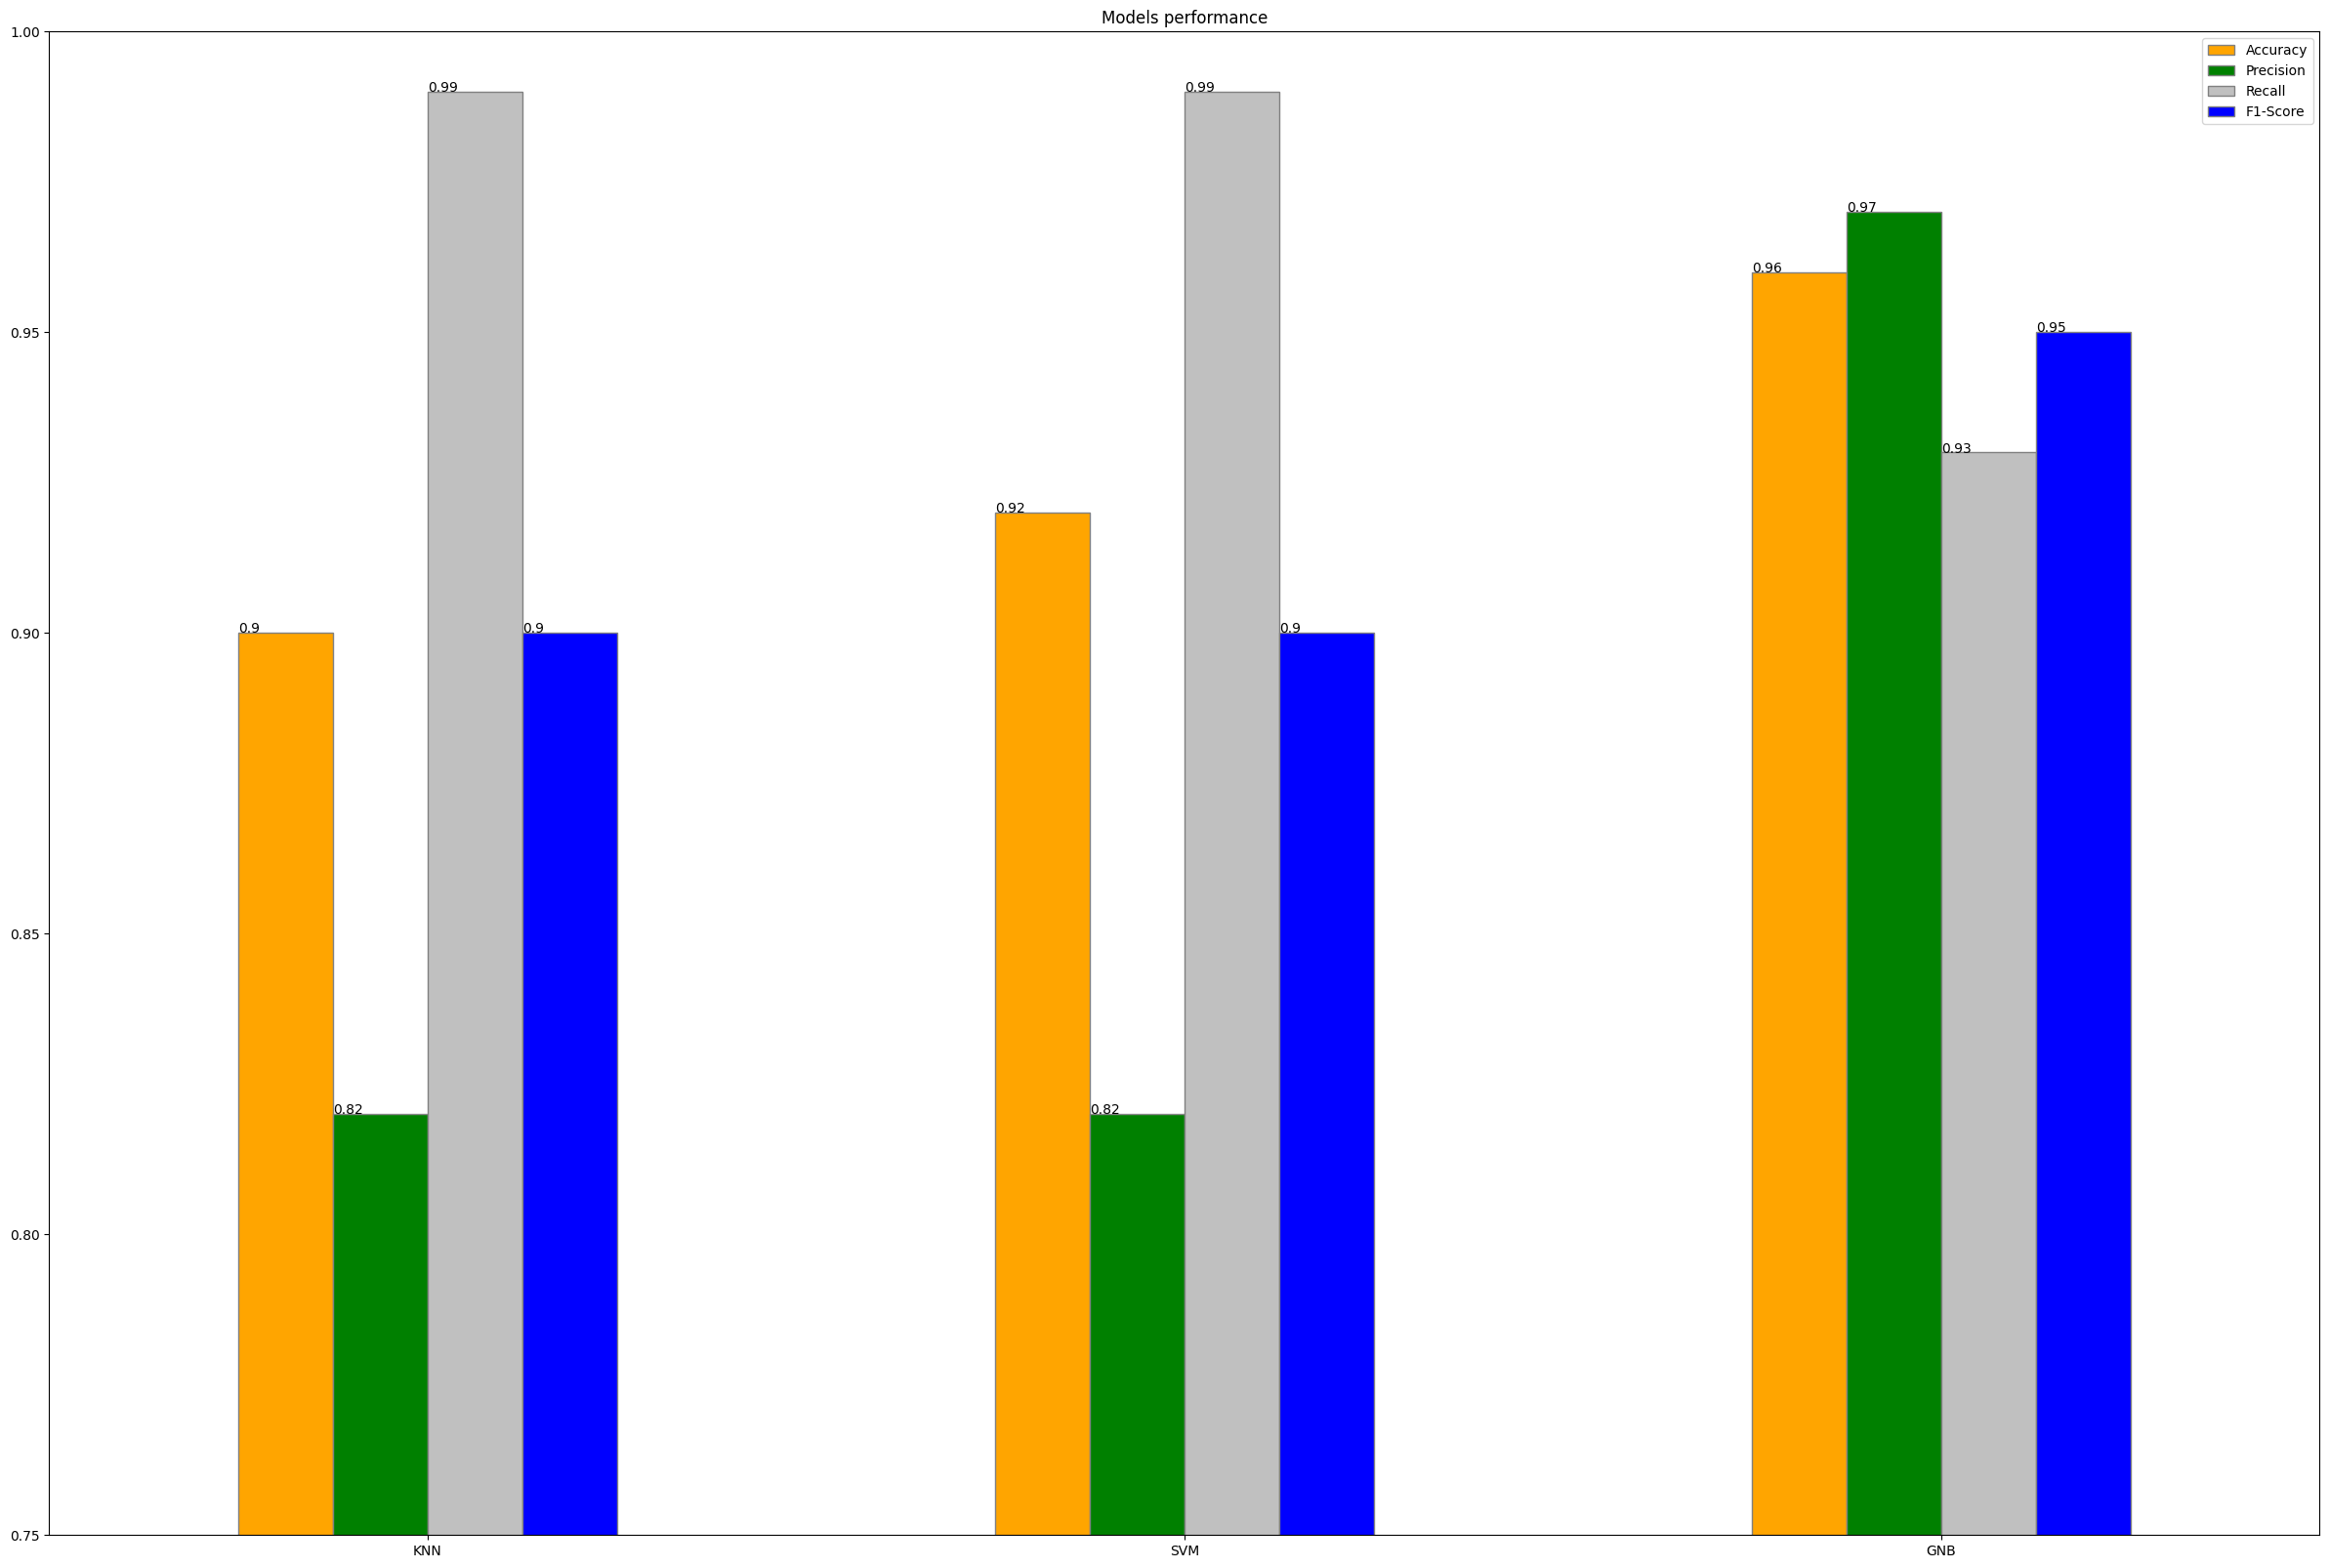

In [ ]:
models_metrics = {'Accuracy': [0.90, 0.92, 0.96],
                 'Precision': [0.82, 0.82, 0.97],
                 'Recall' : [0.99, 0.99, 0.93],
                'F1-Score' : [0.90, 0.90, 0.95]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'KNN', 1:'SVM', 2: 'GNB',3: 'LR'},
                 inplace=True)
ax = df.plot(kind='bar', figsize = (30,20), ylim = (0.75, 1),
        color = ['orange', 'green', 'silver', 'blue'],
        rot = 0, title ='Models performance',
        edgecolor = 'grey', alpha = 1)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()))
#plt.show()
plt.savefig("plot.png", format="png", transparent=True)

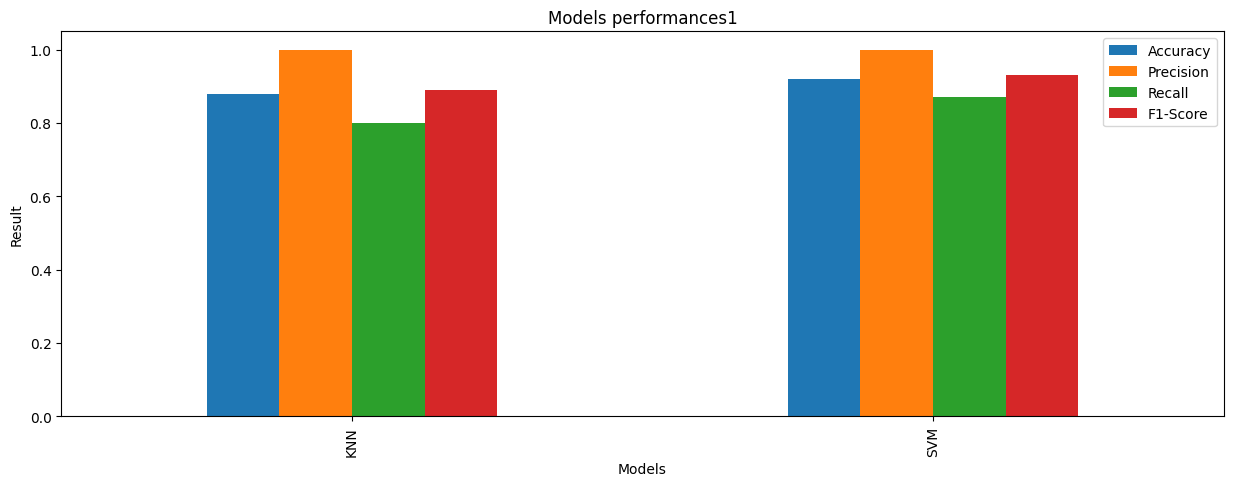

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[0.88, 0.92],

    "Precision":[1.00, 1.00],

    "Recall":[0.80, 0.87],

    "F1-Score":[0.89, 0.93]},

    index=["KNN", "SVM"])

plotdata.plot(kind="bar",figsize=(15, 5))

plt.title("Models performances1")

plt.xlabel("Models")

plt.ylabel("Result")
plt.savefig("plot1.png", format="png", transparent=True)


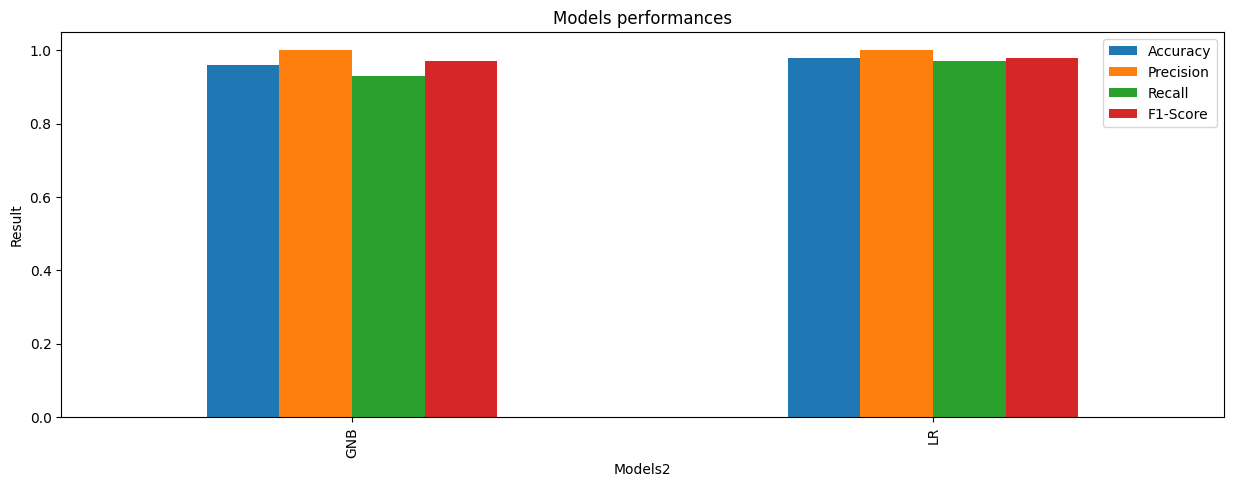

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[0.96, 0.98],

    "Precision":[1.00, 1.00],

    "Recall":[0.93, 0.97],

    "F1-Score":[0.97, 0.98]},

    index=[ "GNB", "LR"])

plotdata.plot(kind="bar",figsize=(15, 5))

plt.title("Models performances")

plt.xlabel("Models2")

plt.ylabel("Result")
plt.savefig("plot2.png", format="png", transparent=True)